# Introducción

El presente analisis se realiza sobre un conjunto de datos normalizados de precios, sucursales y productos derivado de datos 
obtenidos de la página de Precios Claros (http://preciosclaros.gob.ar/). 

En las siguientes secciones se procedera a presentar la información del conjunto de datos. Identificaremos las variables 
más relevantes, sus relaciones y elaboraremos una conclusión al respecto.

# Presentación del Conjunto de Datos

In [1]:
%pylab inline
import sys
import pandas as pd
from io import StringIO
import numpy as np
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


sns.set(style='ticks', color_codes=True)
sns.set_context(context='talk', font_scale=1.2)

in_colab = 'google.colab' in sys.modules

if 'sidetale' not in sys.modules:
    !pip install sidetable

import sidetable

if in_colab:
    from google.colab import files
    # Install Kaggle library
    if 'kaggle' not in sys.modules:
        !pip install -q kaggle


#Definimos colores
BLUE = '#35A7FF'
RED = '#FF5964'


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Upload kaggle API key file only first time
if in_colab:
    uploaded = files.upload()

In [3]:
#move kaggle.json API KEY file 
if in_colab:
    !mv kaggle.json /root/.kaggle

In [4]:
#change permission kaggle.json API KEY file
if in_colab:
    !chmod 600 /root/.kaggle/kaggle.json

In [5]:
#!donwload dataset zip file to colab
if in_colab:
    !kaggle datasets download -d darioyvanoff/preciosucursalproducto

In [6]:
#read dataset zip file
if in_colab:
    file_name = 'preciosucursalproducto.zip'
else:
    file_name = 'precio_sucursal_producto.pkl'   

precio_sucursal_producto = pd.read_pickle(file_name)

In [7]:
precio_sucursal_producto.dtypes

precio                 float64
producto_id             object
sucursal_id             object
fecha                   object
marca                   object
nombre                  object
presentacion            object
categoria1              object
categoria2              object
categoria3              object
comercioId             float64
banderaId              float64
banderaDescripcion      object
comercioRazonSocial     object
provincia               object
localidad               object
direccion               object
lat                    float64
lng                    float64
sucursalNombre          object
sucursalTipo            object
nom_provincia           object
region                  object
cantidad               float64
unidad                  object
nombre_sin_um           object
dtype: object

In [8]:
precio_sucursal_producto.describe(include='all')

precio    producto_id sucursal_id     fecha      marca  \
count   2.214788e+06        2222411     2222411   2222411    2222411   
unique           NaN          71716         513         5       5644   
top              NaN  7793100111563      49-1-2  20200426  SIN MARCA   
freq             NaN            545       75516    478909      64702   
mean    1.856890e+02            NaN         NaN       NaN        NaN   
std     3.627684e+02            NaN         NaN       NaN        NaN   
min     1.200000e-01            NaN         NaN       NaN        NaN   
25%     6.690000e+01            NaN         NaN       NaN        NaN   
50%     1.189500e+02            NaN         NaN       NaN        NaN   
75%     2.140000e+02            NaN         NaN       NaN        NaN   
max     3.590000e+04            NaN         NaN       NaN        NaN   

                                          nombre presentacion  \
count                                    2222411      2222411   
unique                                     63660         1168   
top     Edulcorante Liquido Hileret Zucra 200 Cc       1.0 kg   
freq                                         723       109079   
mean                                         NaN          NaN   
std                                          NaN          NaN   
min                                          NaN          NaN   
25%                                          NaN          NaN   
50%                                          NaN          NaN   
75%                                          NaN          NaN   
max                                          NaN          NaN   

                           categoria1       categoria2        categoria3  ...  \
count                               5                5                 5  ...   
unique                              2                2                 2  ...   
top     Perfumería y Cuidado Personal  Cuidado Capilar  Acondicionadores  ...   
freq                                4                4                 4  ...   
mean                              NaN              NaN               NaN  ...   
std                               NaN              NaN               NaN  ...   
min                               NaN              NaN               NaN  ...   
25%                               NaN              NaN               NaN  ...   
50%                               NaN              NaN               NaN  ...   
75%                               NaN              NaN               NaN  ...   
max                               NaN              NaN               NaN  ...   

                           direccion           lat           lng  \
count                        2202411  2.202411e+06  2.202411e+06   
unique                           491           NaN           NaN   
top     Av. 25 De Mayo Y Garmendia 0           NaN           NaN   
freq                           75516           NaN           NaN   
mean                             NaN -3.454504e+01 -6.285409e+01   
std                              NaN  6.110636e+00  4.054112e+00   
min                              NaN -5.481010e+01 -7.221356e+01   
25%                              NaN -3.660429e+01 -6.545231e+01   
50%                              NaN -3.459195e+01 -6.289345e+01   
75%                              NaN -3.155759e+01 -5.862642e+01   
max                              NaN -2.313573e+01 -5.589373e+01   

       sucursalNombre  sucursalTipo              nom_provincia   region  \
count         2202411       2202411                    2202411  2202411   
unique            464             4                         24        4   
top      Super TUTI 3  Supermercado  Provincia de Buenos Aires   Centro   
freq            75516       1098206                     772902  1207678   
mean              NaN           NaN                        NaN      NaN   
std               NaN           NaN                        NaN      NaN   
min               NaN           NaN                  

# Variables de interés

Basado en que el objetivo final de este proyecto es encontrar una forma de identificar si un producto está caro o barato, no en una sucursal puntual, sino dada una región o ciudad hemos decidido como variables relevantes:
- producto_id/nombre_sin_um/marca: identifican a un producto y son variables categóricas nominales.
- localidad, provincia,region: que especifican la ubicación de la tienda y que son variables categóricas nominales.
- comercioRazonSocial: variable categórica nominal.
- fecha: variable cuantitativa
- precio: variable cuantitativa continua.
- presentacion: variable categórica nominal.

In [9]:
precio_sucursal_producto[precio_sucursal_producto.region=='Patagonia'].nom_provincia.unique()

array(['Chubut', 'Santa Cruz', 'Río Negro', 'Neuquén', 'Tierra del Fuego'],
      dtype=object)

In [10]:
precio_sucursal_producto.head()

precio    producto_id sucursal_id     fecha       marca  \
0   29.90  0000000001663     2-1-014  20200412  LA ANÓNIMA   
1   29.90  0000000002288     2-1-032  20200412  LA ANÓNIMA   
2   39.90  0000000002288     2-1-096  20200412  LA ANÓNIMA   
3  499.99  0000000205870     9-1-686  20200412   SIN MARCA   
4  519.99  0000000205870     9-2-248  20200412   SIN MARCA   

                            nombre presentacion categoria1 categoria2  \
0  Radicheta Atada La Anonima 1 Un       1.0 un        NaN        NaN   
1    Perejil Atado La Anonima 1 Un       1.0 un        NaN        NaN   
2    Perejil Atado La Anonima 1 Un       1.0 un        NaN        NaN   
3                 Ojo de Bife 1 Kg       1.0 kg        NaN        NaN   
4                 Ojo de Bife 1 Kg       1.0 kg        NaN        NaN   

  categoria3  ...                              direccion       lat       lng  \
0        NaN  ...                          H.Yrigoyen 76 -42.76422 -65.03623   
1        NaN  ...                           Belgrano 515 -46.44466 -67.52854   
2        NaN  ...                             Moreno 360 -34.29066 -60.25439   
3        NaN  ...  San Martín Entre Parana Y Gualeguay 0 -33.01060 -58.52790   
4        NaN  ...               Santiago Del Estero 2690 -36.68820 -56.68350   

    sucursalNombre  sucursalTipo              nom_provincia     region  \
0    PUERTO MADRYN  Supermercado                     Chubut  Patagonia   
1  CALETA OLIVIA 2  Supermercado                 Santa Cruz  Patagonia   
2            SALTO  Supermercado  Provincia de Buenos Aires     Centro   
3     Gualeguaychú  Supermercado                 Entre Ríos     Centro   
4    San Bernardo.  Supermercado  Provincia de Buenos Aires     Centro   

   cantidad  unidad               nombre_sin_um  
0       1.0      un  Radicheta Atada La Anonima  
1       1.0      un    Perejil Atado La Anonima  
2       1.0      un    Perejil Atado La Anonima  
3       1.0      kg                 Ojo de Bife  
4       1.0      kg                 Ojo de Bife  

[5 rows x 26 columns]

In [11]:
precio_sucursal_producto.shape

(2222411, 26)

In [12]:
precio_sucursal_producto.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index        0
0            categoria1  2222406
1            categoria2  2222406
2            categoria3  2222406
3   comercioRazonSocial    20000
4             direccion    20000
5                region    20000
6         nom_provincia    20000
7          sucursalTipo    20000
8        sucursalNombre    20000
9                   lng    20000
10           comercioId    20000
11            banderaId    20000
12   banderaDescripcion    20000
13                  lat    20000
14            provincia    20000
15            localidad    20000
16               precio     7623
17          producto_id        0
18         presentacion        0
19               nombre        0
20                marca        0
21                fecha        0
22          sucursal_id        0
23             cantidad        0
24               unidad        0
25        nombre_sin_um        0

Como se observa en las variables de interes seleccionadas se encuentran 7623 NaN en la variable precio mientras que se ecuentran  20000 NaN en comercioRazonSocial, provincia y localidad.

**Importante:** Habida cuenta que las 7623 filas de precios NaN representan solo el 0.34% de los datos decidimos eliminarlos de nuestro conjunto de datos.

Generamos un dataset solo con las variables relevantes identificadas que se utilizará para las siguientes secciones de análisis

In [13]:
#Generamos un dataset con las variables de interes sin NaN en precios y convirtiendo la fecha a int64 para mejor tratamiento posterior
precio_no_nan=~precio_sucursal_producto.precio.isna()
dataset = precio_sucursal_producto[precio_no_nan]
datasetNew=dataset[['fecha','sucursal_id','producto_id','nombre_sin_um','localidad','nom_provincia','region','comercioRazonSocial','presentacion','precio','cantidad','unidad','marca']]
datasetNew=datasetNew.astype({'fecha': 'int64'})
datasetNew.shape

(2214788, 13)

**Nota:** Luego de eliminar los NaN en la columna precio del dataset original obtenemos un conjunto de datos con 7623 filas menos ( 2222411 - 2214788) en nuestro conjunto de datos.

**Chequeo NaN en variables de intereses de nuestro nuevo dataset**

A continuación vamos a revisar de las variables de interes que valores quedaron en NaN luego de haber descartado las filas con NaN en la variable precio.

In [14]:
#Chequeoamos presencia de NaN en variables de interes
datasetNew.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index      0
0             localidad  17998
1         nom_provincia  17998
2                region  17998
3   comercioRazonSocial  17998
4                 fecha      0
5           sucursal_id      0
6           producto_id      0
7         nombre_sin_um      0
8          presentacion      0
9                precio      0
10             cantidad      0
11               unidad      0
12                marca      0

**Nota** como podemos observar existen la misma cantidad de filas con comercioRazonSocial, region, nom_provincia y localidad en NaN. Dato el porcentaje bajo respecto a la muestra hemos decidido eliminar las filas en donde estas variables tengan NaN.

In [15]:
localidad_no_nan=~datasetNew.localidad.isna()
dataset_aux = datasetNew[localidad_no_nan]
datasetNew=dataset_aux[['fecha','sucursal_id','producto_id','nombre_sin_um','localidad','nom_provincia','region','comercioRazonSocial','presentacion','precio','cantidad','unidad','marca']]
datasetNew=datasetNew.astype({'fecha': 'int64'})
datasetNew.shape

(2196790, 13)

In [16]:
#Chequeo de NaN en variables de interes
datasetNew.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index  0
0                 fecha  0
1           sucursal_id  0
2           producto_id  0
3         nombre_sin_um  0
4             localidad  0
5         nom_provincia  0
6                region  0
7   comercioRazonSocial  0
8          presentacion  0
9                precio  0
10             cantidad  0
11               unidad  0
12                marca  0

A continuación procederemos a agregar dos nuevas variables las cuales son el precio por unidad de medida y la unidad de medida. Llevaremos gr a kg, cc y ml a lt y dejaremos tal cual estan un, mt, kg. El precio sera dividido por la cantidqd de manera de tener precios por unidades.

In [17]:
#Mostramos las unidades de medida existentes en el conjunto de datos
pd.Series(datasetNew.unidad.unique()).to_frame()

0
0  un
1  kg
2  gr
3  ml
4  cc
5  lt
6  mt

In [18]:
#Definimos una función para dividir precio por cantidad y unificar las unidades de medida
def precioXUnidad(cantidad,unidad,precio):
    if unidad in ('un', 'mt','kg','lt'):
        return round(precio/cantidad,2) , unidad
    elif unidad in ('gr'):
        return round(precio/cantidad*1000,2) , 'kg'
    elif unidad in ('ml','cc'):
        return round(precio/cantidad*1000,2) , 'lt'

#Creamos dos nuevas columnas denominadas PrecioXUnidad y nuevaUnidad para los valores "homogeneizados"        
datasetNew[['PrecioXUnidad','nuevaUnidad']] = datasetNew.apply(lambda x: precioXUnidad(x['cantidad'],x['unidad'],x['precio']),axis=1, result_type='expand')

A modo de ejemplo mostramos la conversion de gramos a kg. Se agregaron dos nuevas columnas llamadas PrecioXUnidad y nuevaUnidad

In [19]:
datasetNew[datasetNew.unidad=='gr'].round(2)

fecha sucursal_id    producto_id  \
57       20200412    10-2-286  0000000630344   
58       20200412    10-3-453  0000000630344   
62       20200412     9-1-194  0000001307504   
63       20200412     9-2-248  0000001307504   
64       20200412    9-3-5626  0000001307504   
...           ...         ...            ...   
2222393  20200518   11-5-1020  9044400841017   
2222413  20200518      25-1-1  9569753142128   
2222415  20200518       5-1-4  9990385651922   
2222416  20200518       5-1-4  9990385651939   
2222417  20200518       5-1-4  9990385651946   

                                             nombre_sin_um  \
57                            Pan Dulce con Frutas Cristal   
58                            Pan Dulce con Frutas Cristal   
62                   Ketchup Rocket Up Side Down Pet Heinz   
63                   Ketchup Rocket Up Side Down Pet Heinz   
64                   Ketchup Rocket Up Side Down Pet Heinz   
...                                                    ...   
2222393                                Pastillas Nenas Pez   
2222413  Milhojas Cobertura de Chocolate Blanco Deli-Sitas   
2222415                         Te Neo en Hebras Lata Dana   
2222416                       Te Verde en Hebras Lata Dana   
2222417                   Yerba Mate Aromatizada Lata Dana   

                     localidad              nom_provincia        region  \
57                   Tupungato                    Mendoza          Cuyo   
58                    Banfield  Provincia de Buenos Aires        Centro   
62                    SAN JUAN                   San Juan          Cuyo   
63       SAN BERNARDO DEL TUYU  Provincia de Buenos Aires        Centro   
64             GENERAL PACHECO  Provincia de Buenos Aires        Centro   
...                        ...                        ...           ...   
2222393  SAN MIGUEL DE TUCUMAN                    Tucumán  Norte Grande   
2222413               LA PLATA  Provincia de Buenos Aires        Centro   
2222415                Posadas                   Misiones  Norte Grande   
2222416                Posadas                   Misiones  Norte Grande   
2222417                Posadas                   Misiones  Norte Grande   

                                       comercioRazonSocial presentacion  \
57                                                INC S.A.     400.0 gr   
58                                                INC S.A.     400.0 gr   
62                             Jumbo Retail Argentina S.A.     397.0 gr   
63                             Jumbo Retail Argentina S.A.     397.0 gr   
64                             Jumbo Retail Argentina S.A.     397.0 gr   
...                                                    ...          ...   
2222393                          Wal Mart Argentina S.R.L.      25.5 gr   
2222413  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 gr   
2222415                                    California S.A.      50.0 gr   
2222416                                    California S.A.      50.0 gr   
2222417                                    California S.A.     150.0 gr   

         precio  cantidad unidad        marca  PrecioXUnidad nuevaUnidad  
57        79.00     400.0     gr      CRISTAL         197.50          kg  
58       165.00     400.0     gr      CRISTAL         412.50          kg  
62       229.00     397.0     gr        HEINZ         576.83          kg  
63       229.00     397.0     gr        HEINZ         576.83          kg  
64       229.00     397.0     gr        HEINZ         576.83          kg  
...         ...       ...    ...          ...            ...         ...  
2222393  302.60      25.5     gr    SIN MARCA       11866.67          kg  
2222413  149.99     500.0     gr  DELI-SITAS          299.98          kg  
2222415  312.50      50.0     gr         DANA        6250.00          kg  
2222416  312.50      50.0     gr         DANA        6250.00          kg  
2222417  198.90     150.0     gr         DANA        1326.00   

# Estadísticos

Comenzamos mostrando los valores estadisticos de media, mediana, desvios entre otros de las variables de interes en el conjunto de datos

In [20]:
datasetNew.describe(include='all')

fecha sucursal_id    producto_id   nombre_sin_um localidad  \
count   2.196790e+06     2196790        2196790         2196790   2196790   
unique           NaN         488          71210           57865       306   
top              NaN      49-1-2  7793100111563  Gaseosa Sprite  LA PLATA   
freq             NaN       75516            539            1351    161996   
mean    2.020045e+07         NaN            NaN             NaN       NaN   
std     4.428502e+01         NaN            NaN             NaN       NaN   
min     2.020041e+07         NaN            NaN             NaN       NaN   
25%     2.020042e+07         NaN            NaN             NaN       NaN   
50%     2.020043e+07         NaN            NaN             NaN       NaN   
75%     2.020050e+07         NaN            NaN             NaN       NaN   
max     2.020052e+07         NaN            NaN             NaN       NaN   

                    nom_provincia   region comercioRazonSocial presentacion  \
count                     2196790  2196790             2196790      2196790   
unique                         24        4                  33         1162   
top     Provincia de Buenos Aires   Centro            INC S.A.       1.0 kg   
freq                       767427  1202057              556040       107840   
mean                          NaN      NaN                 NaN          NaN   
std                           NaN      NaN                 NaN          NaN   
min                           NaN      NaN                 NaN          NaN   
25%                           NaN      NaN                 NaN          NaN   
50%                           NaN      NaN                 NaN          NaN   
75%                           NaN      NaN                 NaN          NaN   
max                           NaN      NaN                 NaN          NaN   

              precio      cantidad   unidad      marca  PrecioXUnidad  \
count   2.196790e+06  2.196790e+06  2196790    2196790   2.196790e+06   
unique           NaN           NaN        7       5611            NaN   
top              NaN           NaN       gr  SIN MARCA            NaN   
freq             NaN           NaN   936582      64440            NaN   
mean    1.858568e+02  2.412165e+02      NaN        NaN   8.112601e+02   
std     3.623818e+02  2.571335e+02      NaN        NaN   3.131461e+03   
min     1.200000e-01  8.000000e-01      NaN        NaN   0.000000e+00   
25%     6.695000e+01  1.600000e+01      NaN        NaN   1.115400e+02   
50%     1.190000e+02  1.500000e+02      NaN        NaN   3.113300e+02   
75%     2.149000e+02  4.000000e+02      NaN        NaN   7.160000e+02   
max     3.590000e+04  1.125000e+03      NaN        NaN   4.450000e+05   

       nuevaUnidad  
count      2196790  
unique           4  
top             kg  
freq       1070093  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

**a- Outliers de variables seleccionadas**

En esta sección se verificará la existencia de outliers en PrecioXUnidad. Para ello en primera medida se procedera a realizar representaciones gráficas a través de boxplot de manera de poder identificarlos.

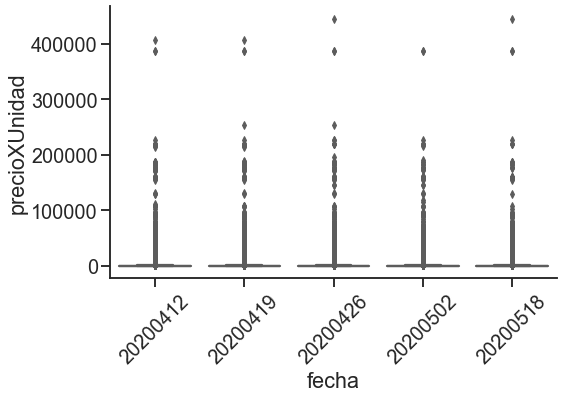

In [21]:
plt.figure(figsize=(8,5))
p1=sns.boxplot(data=datasetNew, color=BLUE,
                x='fecha', y='PrecioXUnidad')
plt.ylabel('precioXUnidad')
plt.xlabel('fecha')
plt.xticks(rotation=45)
sns.despine()

**OBTENCIÓN DE OUTLIERS**

A continuación obtenemos un dataset con media y desvios de cada producto a nivel nacional para luego obtener un dataset con todos los outliers que esten a mas de 3 desvios standares para cada fecha del conjunto de datos

In [22]:
#funcion para determinar el desvío estámdard poblacional
def pop_std(x):
      return x.std(ddof=0)

In [23]:
# Obtenemos un dataset cde medias y desvios para fecha y producto
df_product_mean_std=datasetNew[['fecha','producto_id','PrecioXUnidad']].groupby(['fecha','producto_id'],as_index=False).agg(['mean',pop_std])
df_product_mean_std.columns = ['media','desvio']
df_product_mean_std = df_product_mean_std.reset_index()
df_product_mean_std.head()

fecha    producto_id   media     desvio
0  20200412  0000000001663   29.90   0.000000
1  20200412  0000000002288   34.90   5.000000
2  20200412  0000000205870  524.99  16.583124
3  20200412  0000000205894  589.99   0.000000
4  20200412  0000000205955  189.99   0.000000

In [24]:
#Unimos los dataset de medias y desvios al dataset original para obtener un dataset resultante con media y desvio de cada producto
datasetNew=pd.merge(datasetNew,df_product_mean_std)

In [25]:
datasetNew.head()

fecha sucursal_id    producto_id               nombre_sin_um  \
0  20200412     2-1-014  0000000001663  Radicheta Atada La Anonima   
1  20200412     2-1-032  0000000002288    Perejil Atado La Anonima   
2  20200412     2-1-096  0000000002288    Perejil Atado La Anonima   
3  20200412     9-1-686  0000000205870                 Ojo de Bife   
4  20200412     9-2-248  0000000205870                 Ojo de Bife   

               localidad              nom_provincia     region  \
0          Puerto Madryn                     Chubut  Patagonia   
1          Caleta Olivia                 Santa Cruz  Patagonia   
2                  Salto  Provincia de Buenos Aires     Centro   
3           GUALEGUAYCHU                 Entre Ríos     Centro   
4  SAN BERNARDO DEL TUYU  Provincia de Buenos Aires     Centro   

                              comercioRazonSocial presentacion  precio  \
0  S.A. Importadora y Exportadora de la Patagonia       1.0 un   29.90   
1  S.A. Importadora y Exportadora de la Patagonia       1.0 un   29.90   
2  S.A. Importadora y Exportadora de la Patagonia       1.0 un   39.90   
3                     Jumbo Retail Argentina S.A.       1.0 kg  499.99   
4                     Jumbo Retail Argentina S.A.       1.0 kg  519.99   

   cantidad unidad       marca  PrecioXUnidad nuevaUnidad   media     desvio  
0       1.0     un  LA ANÓNIMA          29.90          un   29.90   0.000000  
1       1.0     un  LA ANÓNIMA          29.90          un   34.90   5.000000  
2       1.0     un  LA ANÓNIMA          39.90          un   34.90   5.000000  
3       1.0     kg   SIN MARCA         499.99          kg  524.99  16.583124  
4       1.0     kg   SIN MARCA         519.99          kg  524.99  16.583124

In [26]:
#Chequeoamos presencia de NaN en variables de interes
datasetNew.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index  0
0                 fecha  0
1                precio  0
2                 media  0
3           nuevaUnidad  0
4         PrecioXUnidad  0
5                 marca  0
6                unidad  0
7              cantidad  0
8          presentacion  0
9           sucursal_id  0
10  comercioRazonSocial  0
11               region  0
12        nom_provincia  0
13            localidad  0
14        nombre_sin_um  0
15          producto_id  0
16               desvio  0

**Generamos un dataset con los outliers globales del dataset para verificar su tamaño**

In [27]:
outliers=datasetNew[(datasetNew.PrecioXUnidad > (datasetNew.media + (3 * datasetNew.desvio))) |  (datasetNew.PrecioXUnidad < (datasetNew.media - (3 * datasetNew.desvio)))] 
outliers.head()

fecha sucursal_id    producto_id                        nombre_sin_um  \
254  20200412    9-3-5251  0000042231486  Gel Exfoliante en Pomo Nivea Visage   
402  20200412    9-3-5216  0000042300076           Crema Facial Cuidado Nivea   
445  20200412      14-1-8  0000042300083           Crema Facial Cuidado Nivea   
568  20200412    10-1-240  0000075026455   Desodorante Stick Nutritivo Rexona   
691  20200412     9-2-583  0000075027513            Desodorante Original Dove   

                     localidad nom_provincia        region  \
254                      SALTA         Salta  Norte Grande   
402                    NEUQUEN       Neuquén     Patagonia   
445  Santa Rosa De Calamuchita       Córdoba        Centro   
568               Gualeguaychu    Entre Ríos        Centro   
691              VILLA ALLENDE       Córdoba        Centro   

             comercioRazonSocial presentacion  precio  cantidad unidad  \
254  Jumbo Retail Argentina S.A.      75.0 ml   339.0      75.0     ml   
402  Jumbo Retail Argentina S.A.      50.0 ml   186.0      50.0     ml   
445          Miguel Becerra S.A.     100.0 ml   139.9     100.0     ml   
568                     INC S.A.      50.0 gr   135.0      50.0     gr   
691  Jumbo Retail Argentina S.A.      50.0 gr   249.0      50.0     gr   

      marca  PrecioXUnidad nuevaUnidad        media      desvio  
254   NIVEA         4520.0          lt  3335.108409  357.026477  
402   NIVEA         3720.0          lt  2844.368421  229.122953  
445   NIVEA         1399.0          lt  2139.989362  188.641681  
568  REXONA         2700.0          kg  3444.389286  233.679428  
691    DOVE         4980.0          kg  3989.493333  328.124457

In [28]:
outliers.shape

(16001, 17)

In [29]:
datasetNew.shape

(2196790, 17)

A continuación mostramos un ejemplo de outlier

In [30]:
datasetNew[(datasetNew.sucursal_id=='10-1-55') & (datasetNew.producto_id=='8711700045902')] 

fecha sucursal_id    producto_id  \
1396450  20200426     10-1-55  8711700045902   
1789885  20200502     10-1-55  8711700045902   
2194001  20200518     10-1-55  8711700045902   

                                             nombre_sin_um localidad  \
1396450  Abrillantador Liquido para Lavavajillas Sun Pr...   Formosa   
1789885  Abrillantador Liquido para Lavavajillas Sun Pr...   Formosa   
2194001  Abrillantador Liquido para Lavavajillas Sun Pr...   Formosa   

        nom_provincia        region comercioRazonSocial presentacion  precio  \
1396450       Formosa  Norte Grande            INC S.A.     500.0 cc   248.0   
1789885       Formosa  Norte Grande            INC S.A.     500.0 cc   248.0   
2194001       Formosa  Norte Grande            INC S.A.     500.0 cc   248.0   

         cantidad unidad marca  PrecioXUnidad nuevaUnidad        media  \
1396450     500.0     cc   SUN          496.0          lt  1447.714231   
1789885     500.0     cc   SUN          496.0          lt  1455.842807   
2194001     500.0     cc   SUN          496.0          lt  1447.908519   

             desvio  
1396450  255.246663  
1789885  304.610339  
2194001  288.124303

In [31]:
datasetNew[(datasetNew.producto_id=='8711700045902')].describe(include='all')

fecha sucursal_id    producto_id  \
count   1.630000e+02         163            163   
unique           NaN         112              1   
top              NaN    10-2-110  8711700045902   
freq             NaN           3            163   
mean    2.020048e+07         NaN            NaN   
std     3.972704e+01         NaN            NaN   
min     2.020043e+07         NaN            NaN   
25%     2.020043e+07         NaN            NaN   
50%     2.020050e+07         NaN            NaN   
75%     2.020052e+07         NaN            NaN   
max     2.020052e+07         NaN            NaN   

                                            nombre_sin_um localidad  \
count                                                 163       163   
unique                                                  1        84   
top     Abrillantador Liquido para Lavavajillas Sun Pr...   Formosa   
freq                                                  163         6   
mean                                                  NaN       NaN   
std                                                   NaN       NaN   
min                                                   NaN       NaN   
25%                                                   NaN       NaN   
50%                                                   NaN       NaN   
75%                                                   NaN       NaN   
max                                                   NaN       NaN   

                    nom_provincia  region comercioRazonSocial presentacion  \
count                         163     163                 163          163   
unique                         23       4                  20            1   
top     Provincia de Buenos Aires  Centro            INC S.A.     500.0 cc   
freq                           24      72                  65          163   
mean                          NaN     NaN                 NaN          NaN   
std                           NaN     NaN                 NaN          NaN   
min                           NaN     NaN                 NaN          NaN   
25%                           NaN     NaN                 NaN          NaN   
50%                           NaN     NaN                 NaN          NaN   
75%                           NaN     NaN                 NaN          NaN   
max                           NaN     NaN                 NaN          NaN   

            precio  cantidad unidad marca  PrecioXUnidad nuevaUnidad  \
count   163.000000     163.0    163   163     163.000000         163   
unique         NaN       NaN      1     1            NaN           1   
top            NaN       NaN     cc   SUN            NaN          lt   
freq           NaN       NaN    163   163            NaN         163   
mean    725.310552     500.0    NaN   NaN    1450.621104         NaN   
std     142.519025       0.0    NaN   NaN     285.038051         NaN   
min      70.990000     500.0    NaN   NaN     141.980000         NaN   
25%     701.000000     500.0    NaN   NaN    1402.000000         NaN   
50%     737.750000     500.0    NaN   NaN    1475.500000         NaN   
75%     794.000000     500.0    NaN   NaN    1588.000000         NaN   
max     959.000000     500.0    NaN   NaN    1918.000000         NaN   

              media      desvio  
count    163.000000  163.000000  
unique          NaN         NaN  
top             NaN         NaN  
freq            NaN         NaN  
mean    1450.621104  283.400786  
std        3.841703   20.497522  
min     1447.714231  255.246663  
25%     1447.714231  255.246663  
50%     1447.908519  288.124303  
75%     1455.842807  304.610339  
max     1455.842807  304.610339

A continuación se muestra el número de outliers de **PrecioXUnidad** en todos los dias informados en el conjunto de datos por un lado, y luego por separado dia por dia por el otro. 

In [32]:
#Vemos cuántos outliers presentan precio juntando todos los dias
print('Todos los dias juntos'
      '\n Outliers de precio: %2i == %2.2f %% del total'
        %(len(outliers), len(outliers)*100/float(len(datasetNew))))

print('')

#Un vistazo a la cantidad de outliers por dia
for i in datasetNew.fecha.unique():
    Out_Glo_precio_dia = len(outliers[outliers.fecha == i])
    print('Día %i'
          '\n Outliers de precio: %2i == %2.2f %% del total'
          %(i,
            Out_Glo_precio_dia, Out_Glo_precio_dia*100/float(len(datasetNew[datasetNew.fecha == i]))))

Todos los dias juntos
 Outliers de precio: 16001 == 0.73 % del total

Día 20200412
 Outliers de precio: 3792 == 0.81 % del total
Día 20200419
 Outliers de precio: 3372 == 0.74 % del total
Día 20200426
 Outliers de precio: 3625 == 0.76 % del total
Día 20200502
 Outliers de precio: 2419 == 0.61 % del total
Día 20200518
 Outliers de precio: 2793 == 0.69 % del total


**Eliminación de outliers**

A continuación se obtiene el dataset sin outlier eliminando los valores que se encuentran a mas de 3 desviíos standard de la media

In [33]:
datasetNew=datasetNew[(numpy.abs(datasetNew.PrecioXUnidad - datasetNew.media) <= (3 * datasetNew.desvio))] 
datasetNew.shape

(2180787, 17)

**b- Dstribuciones de las variables de interés**

Para una primera aproximación vamos a verificar la distrbución de las variable PrecioXUnidad en cada fecha disponible en el conjunto de datos

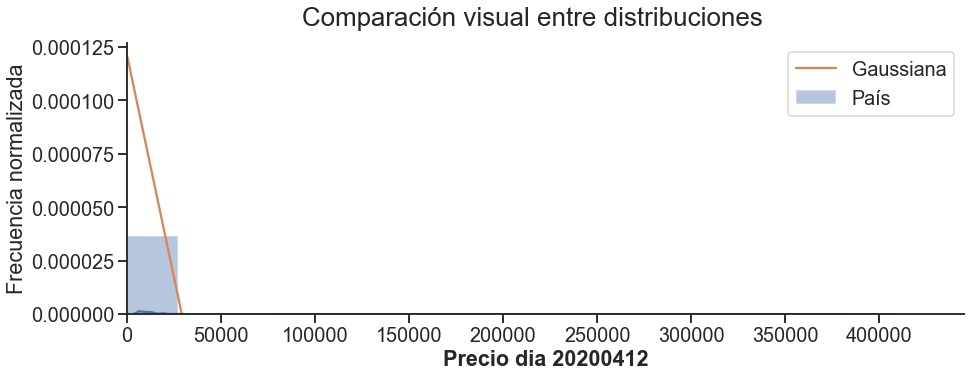

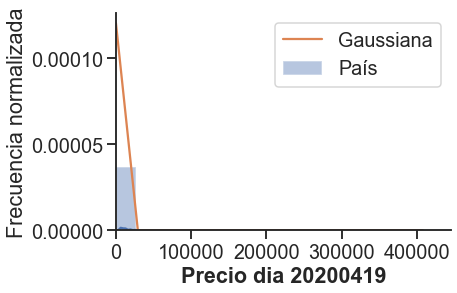

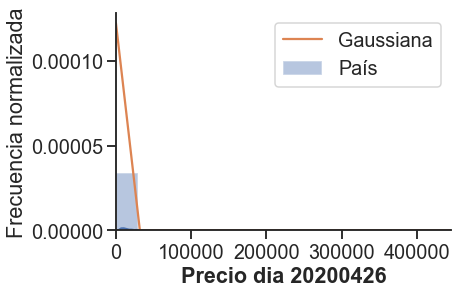

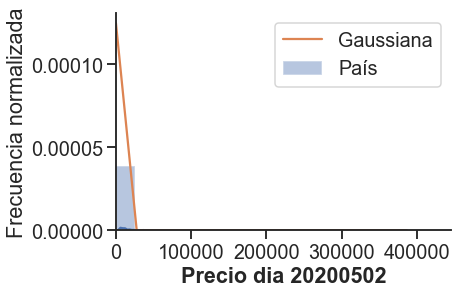

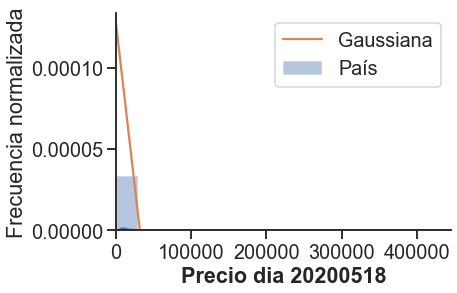

In [34]:
#Un vistazo a la cantidad de outliers por dia
bins_pf=15   #Bines para precio

plt.figure(figsize=(15,5))
plt.suptitle('Comparación visual entre distribuciones')

for i in datasetNew.fecha.unique():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    sns.distplot(datasetNewAux.PrecioXUnidad, kde=True, norm_hist=True, bins=bins_pf, label='País')
    sns.lineplot(np.linspace(min(datasetNewAux.PrecioXUnidad), max(datasetNewAux.PrecioXUnidad), bins_pf),
             sp.stats.norm.pdf(np.linspace(min(datasetNewAux.PrecioXUnidad), max(datasetNewAux.PrecioXUnidad), bins_pf),
                               datasetNewAux.PrecioXUnidad.mean(), datasetNewAux.PrecioXUnidad.std()), label='Gaussiana')
    plt.xlabel('Precio dia %i' %i, weight='bold')
    plt.ylabel('Frecuencia normalizada')
    plt.xlim(min(datasetNew.PrecioXUnidad), max(datasetNew.PrecioXUnidad))
    sns.despine()
    plt.show()
    


Realizamos el test de Kolgomorov sobre la variable PrecioXunidad de todo el conjunto de datos

In [35]:
#Planteamos la primer hipótesis nula
print('Hipótesis nula: La distribución de Precios es Gaussiana con: '
      '\n mu    = %.3f'
      '\n sigma = %.3f'
      %(datasetNew.PrecioXUnidad.mean(), datasetNew.PrecioXUnidad.std())), print('')

#Para realizar el ks_test, se normalizan los datos: (x-mu)/sigma), para luego comparar con una distribución normal.
precio_LAC_normed = (datasetNew.PrecioXUnidad - datasetNew.PrecioXUnidad.mean())/datasetNew.PrecioXUnidad.std()

#Nivel de significancia
alpha_hf = 0.05
print('Definimos un nivel de significancia:'
      '\n alpha =', alpha_hf), print('')

#Realizamos el ks_test
_, pvalue_hf = sp.stats.kstest(precio_LAC_normed, 'norm')
print('Realizamos el estadístico de prueba ks_test:'
     '\n pvalue = %f' %pvalue_hf), print('')

#Vemos los resultados
if (alpha_hf>pvalue_hf):
    print('Se rechaza la hipótesis nula con el nivel de significancia impuesto.')
else:
    print('No se puede rechazar la hipótesis nula con el nivel de significancia impuesto.') 

Hipótesis nula: La distribución de Precios es Gaussiana con: 
 mu    = 812.824
 sigma = 3138.478

Definimos un nivel de significancia:
 alpha = 0.05

Realizamos el estadístico de prueba ks_test:
 pvalue = 0.000000

Se rechaza la hipótesis nula con el nivel de significancia impuesto.


**Nota:** Basados en el test de Kolmogorov antes realizado podes concluir que los PrecioXUnidad no tienen una distribución gausiana. 

Para una segunda aproximación procedemos ahora a verificar la distribución de PrecioXUnidad por rangos de valores y fechas

In [36]:
#Agregamos una nueva columna para determinar rangos de precios
datasetNew['rango'] = pd.cut(datasetNew.PrecioXUnidad, bins= [0, 1500, 3000, 100000000], labels=["low", "medium", "high"], right=False)

In [37]:
#Chequeoamos presencia de NaN en variables de interes
datasetNew.isnull().sum().to_frame().sort_values(0, ascending = False).reset_index()

index  0
0                 fecha  0
1           sucursal_id  0
2                desvio  0
3                 media  0
4           nuevaUnidad  0
5         PrecioXUnidad  0
6                 marca  0
7                unidad  0
8              cantidad  0
9                precio  0
10         presentacion  0
11  comercioRazonSocial  0
12               region  0
13        nom_provincia  0
14            localidad  0
15        nombre_sin_um  0
16          producto_id  0
17                rango  0

In [38]:
#Imprimimos el máximo valor de PrecioXUnidad de cada rango
print("precio maximo segmento low %.f" % datasetNew[datasetNew.rango=='low'].PrecioXUnidad.max())
print("precio maximo segmento medium %.f" % datasetNew[datasetNew.rango=='medium'].PrecioXUnidad.max())
print("precio maximo segmento high %.f" % datasetNew[datasetNew.rango=='high'].PrecioXUnidad.max())

precio maximo segmento low 1500
precio maximo segmento medium 3000
precio maximo segmento high 445000


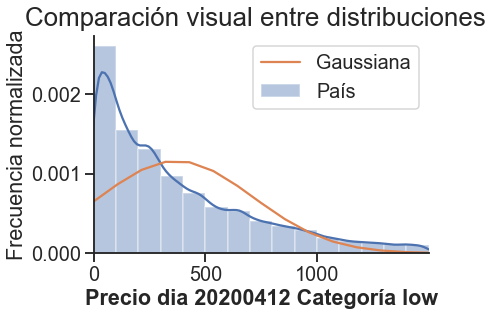

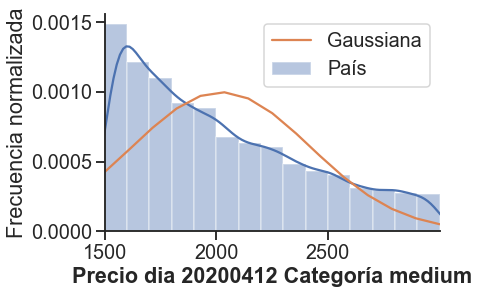

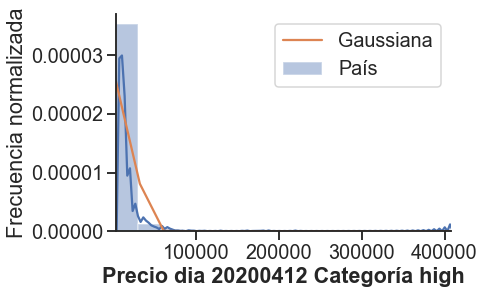

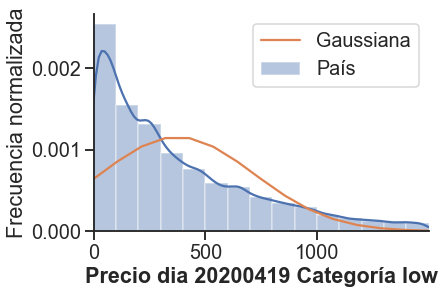

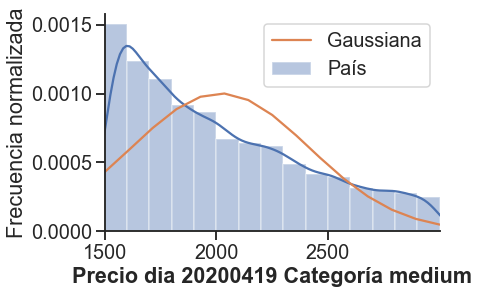

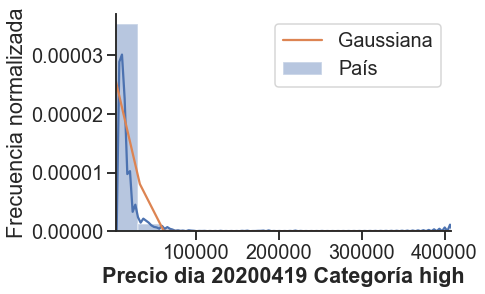

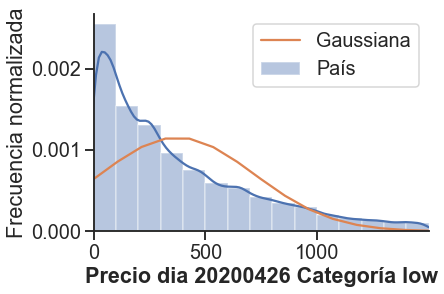

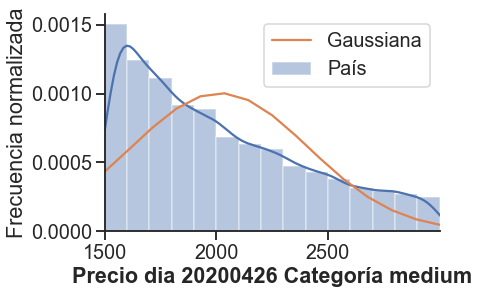

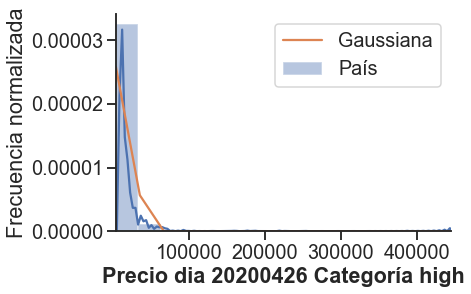

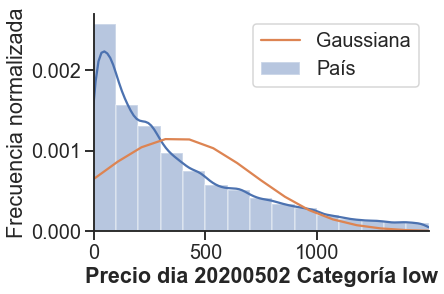

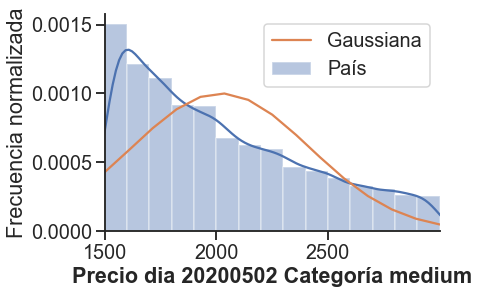

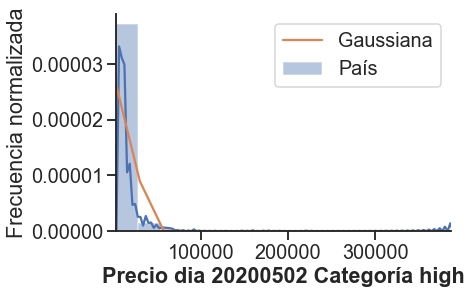

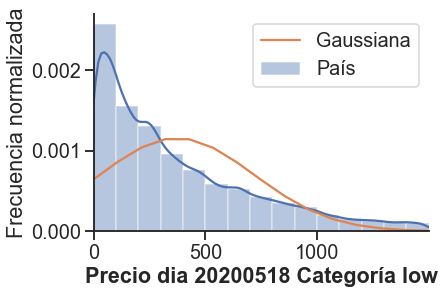

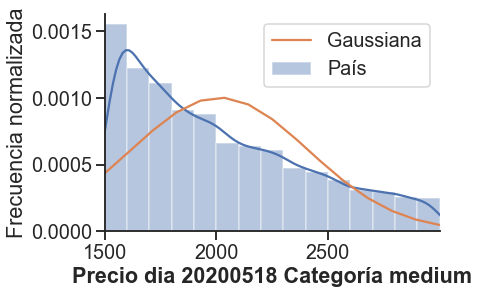

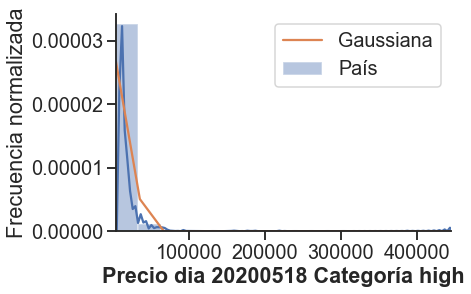

In [39]:
#Un vistazo alas distribuciones por dia y rango de precios
bins_pf=15  #Bines para precio

plt.suptitle('Comparación visual entre distribuciones')

for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    
    for j in datasetNewAux.rango.unique():
        rango= (datasetNewAux.rango==j)
        datasetNewQ=datasetNewAux[rango]
        sns.distplot(datasetNewQ.PrecioXUnidad, kde=True, norm_hist=True, bins=bins_pf, label='País')
        sns.lineplot(np.linspace(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad), bins_pf),
             sp.stats.norm.pdf(np.linspace(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad), bins_pf),
                               datasetNewQ.PrecioXUnidad.mean(), datasetNewQ.PrecioXUnidad.std()), label='Gaussiana')
        plt.xlabel('Precio dia %i' %i+' Categoría %s' %j,weight='bold')
        plt.ylabel('Frecuencia normalizada')
        plt.xlim(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad))
        sns.despine()
        plt.show()

**Nota:** como se observa tomando los rangos de PrecioXUnidad las distribuciones presentan asimetrica con cola hacia la derecha (asimetria positiva)

Ahora Utilizamreos los quartiles para dividir en 4 rangos los precios y tener una forma alternativa de verificar la distribución de los precios

In [40]:
#Categorizamos en una nueva columna el cuartil a la que pertenece cada precio para obtener rangos
quartiles = pd.qcut(datasetNew['PrecioXUnidad'], 4, labels=range(1,5))
datasetNew = datasetNew.assign(quartil=quartiles.values)

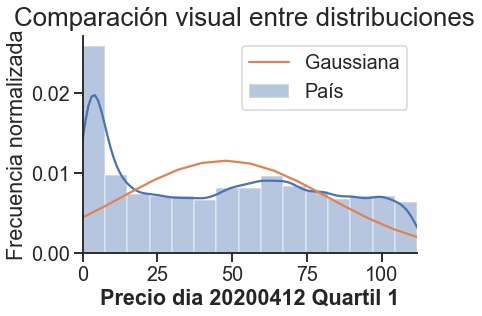

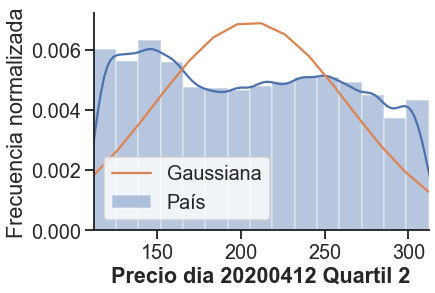

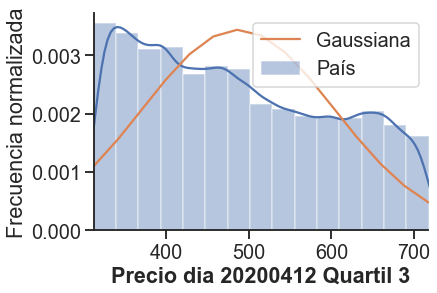

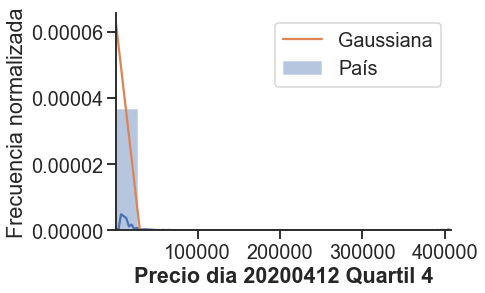

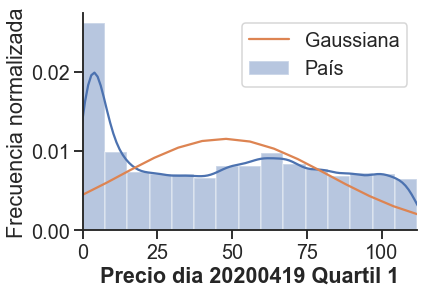

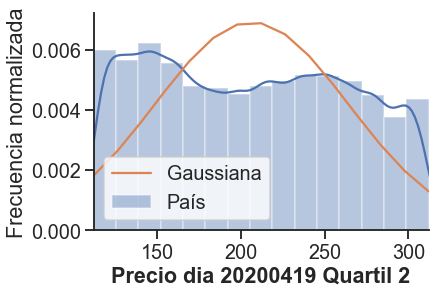

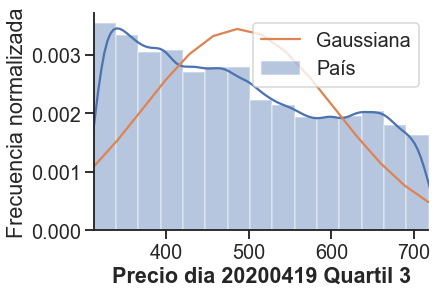

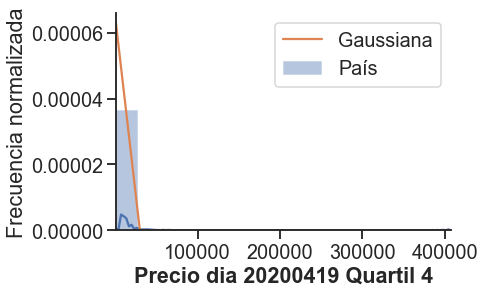

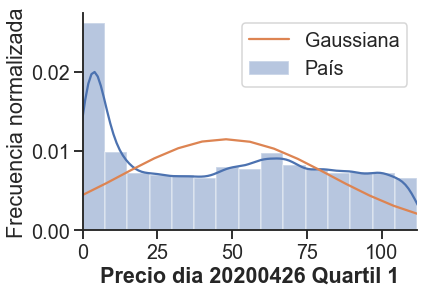

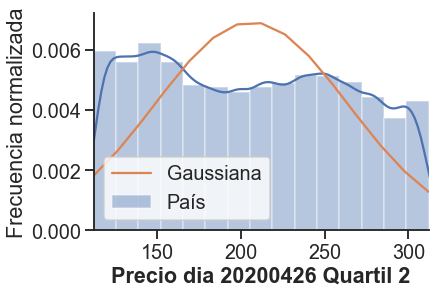

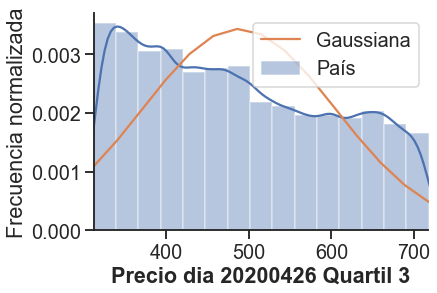

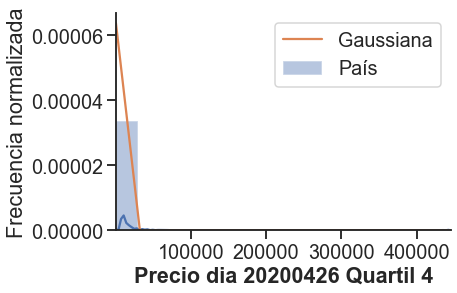

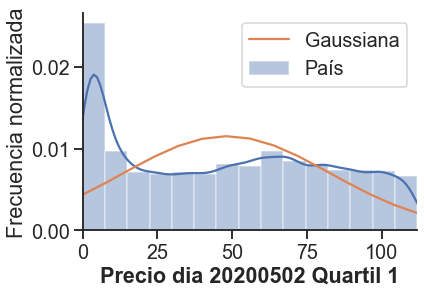

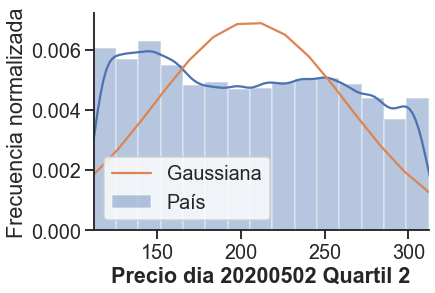

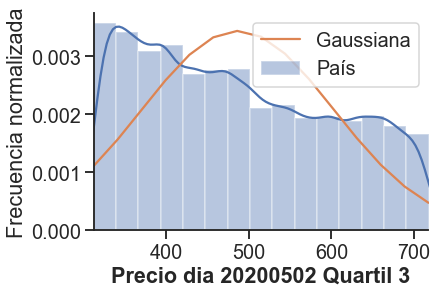

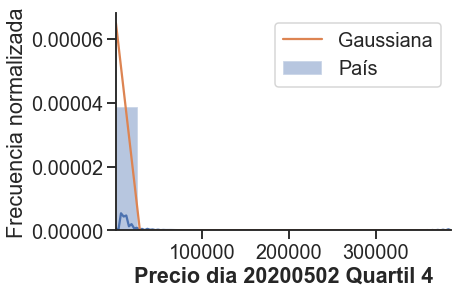

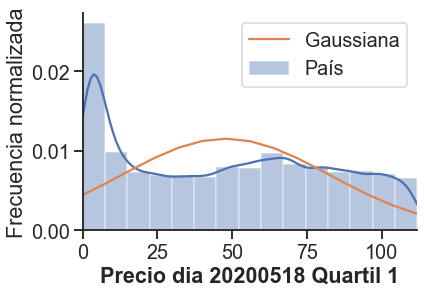

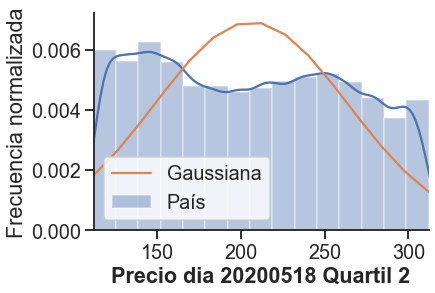

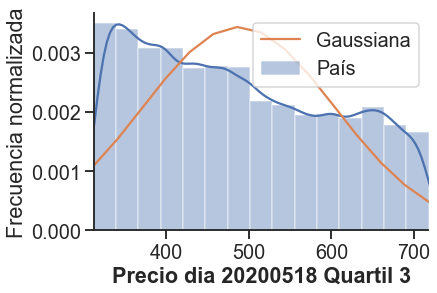

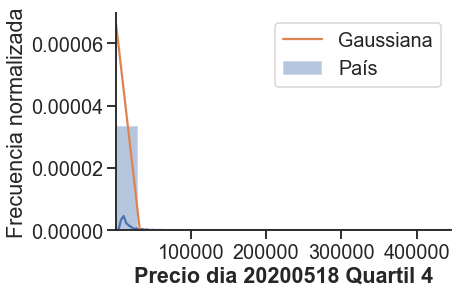

In [41]:
#Un vistazo a la dsitribuciones por dia y quartiles de precios
bins_pf=15  #Bines para precio

plt.suptitle('Comparación visual entre distribuciones')

for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    
    for j in datasetNewAux.quartil.unique().sort_values():
        quartil= (datasetNewAux.quartil==j)
        datasetNewQ=datasetNewAux[quartil]
        sns.distplot(datasetNewQ.PrecioXUnidad, kde=True, norm_hist=True, bins=bins_pf, label='País')
        sns.lineplot(np.linspace(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad), bins_pf),
             sp.stats.norm.pdf(np.linspace(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad), bins_pf),
                               datasetNewQ.PrecioXUnidad.mean(), datasetNewQ.PrecioXUnidad.std()), label='Gaussiana')
        plt.xlabel('Precio dia %i' %i+' Quartil %i' %j,weight='bold')
        plt.ylabel('Frecuencia normalizada')
        plt.xlim(min(datasetNewQ.PrecioXUnidad), max(datasetNewQ.PrecioXUnidad))
        sns.despine()
        plt.show()

**Nota:** si observamos los cuartiles  tambien se puede verificar una distribución asimétrica positiva en los precios como la que se observo con mayor detalle por rangos de precios antes realizada.

Realizamos el test de Kolmogorov para el día 20200412 solo a modo de reconfirmar que los precios no siguen una distribución normal

In [42]:
#Planteamos la primer hipótesis nula
print('Hipótesis nula: La distribución de Precios es Gaussiana con: '
      '\n mu    = %.3f'
      '\n sigma = %.3f'
      %(datasetNew[datasetNew.fecha==20200412].PrecioXUnidad.mean(), datasetNew[datasetNew.fecha==20200412].PrecioXUnidad.std())), print('')

#Para realizar el ks_test, se normalizan los datos: (x-mu)/sigma), para luego comparar con una distribución normal.
precio_LAC_normed = (datasetNew[datasetNew.fecha==20200412].PrecioXUnidad - datasetNew[datasetNew.fecha==20200412].PrecioXUnidad.mean())/datasetNew[datasetNew.fecha==20200412].PrecioXUnidad.std()

#Nivel de significancia
alpha_hf = 0.05
print('Definimos un nivel de significancia:'
      '\n alpha =', alpha_hf), print('')

#Realizamos el ks_test
_, pvalue_hf = sp.stats.kstest(precio_LAC_normed, 'norm')
print('Realizamos el estadístico de prueba ks_test:'
     '\n pvalue = %f' %pvalue_hf), print('')

#Vemos los resultados
if (alpha_hf>pvalue_hf):
    print('Se rechaza la hipótesis nula con el nivel de significancia impuesto.')
else:
    print('No se puede rechazar la hipótesis nula con el nivel de significancia impuesto.') 

Hipótesis nula: La distribución de Precios es Gaussiana con: 
 mu    = 813.707
 sigma = 3191.334

Definimos un nivel de significancia:
 alpha = 0.05

Realizamos el estadístico de prueba ks_test:
 pvalue = 0.000000

Se rechaza la hipótesis nula con el nivel de significancia impuesto.


**Nota:** Basados en el test de Kolmogorov antes realizado podes concluir que los precios no tienen una distribución gausiana. 

**En base a los test realizados podemos concluir que las distribuciones de los precios no responden a la distribución gausiana**

**c- Frecuencia de variables categóricas de interés**

Generamos la tabla de Frecuencia de las variables de interés

In [43]:
datasetNew.describe(exclude=[np.number])

sucursal_id    producto_id   nombre_sin_um localidad  \
count      2180787        2180787         2180787   2180787   
unique         488          71210           57865       306   
top         49-1-2  7500435004664  Gaseosa Sprite  LA PLATA   
freq         74437            529            1330    158930   

                    nom_provincia   region comercioRazonSocial presentacion  \
count                     2180787  2180787             2180787      2180787   
unique                         24        4                  33         1162   
top     Provincia de Buenos Aires   Centro            INC S.A.       1.0 kg   
freq                       759258  1190981              552106       107476   

         unidad      marca nuevaUnidad    rango  quartil  
count   2180787    2180787     2180787  2180787  2180787  
unique        7       5611           4        3        4  
top          gr  SIN MARCA          kg      low        1  
freq     929358      64391     1062376  1962736   545556

In [44]:
datasetNew.stb.freq(['fecha', 'region'])

fecha        region   count    percent  cumulative_count  \
0   20200412        Centro  267004  12.243470            267004   
1   20200426        Centro  248269  11.384376            515273   
2   20200419        Centro  247215  11.336045            762488   
3   20200502        Centro  216826   9.942557            979314   
4   20200518        Centro  211667   9.705991           1190981   
5   20200426     Patagonia  100386   4.603201           1291367   
6   20200426  Norte Grande   95094   4.360536           1386461   
7   20200518  Norte Grande   91094   4.177116           1477555   
8   20200419  Norte Grande   89630   4.109984           1567185   
9   20200419     Patagonia   85234   3.908406           1652419   
10  20200412     Patagonia   73635   3.376533           1726054   
11  20200412  Norte Grande   72482   3.323663           1798536   
12  20200518     Patagonia   71728   3.289088           1870264   
13  20200502     Patagonia   67958   3.116214           1938222   
14  20200502  Norte Grande   61552   2.822467           1999774   
15  20200412          Cuyo   51079   2.342228           2050853   
16  20200502          Cuyo   44671   2.048389           2095524   
17  20200426          Cuyo   29799   1.366433           2125323   
18  20200419          Cuyo   29080   1.333464           2154403   
19  20200518          Cuyo   26384   1.209838           2180787   

    cumulative_percent  
0            12.243470  
1            23.627846  
2            34.963891  
3            44.906449  
4            54.612440  
5            59.215641  
6            63.576177  
7            67.753293  
8            71.863277  
9            75.771682  
10           79.148216  
11           82.471878  
12           85.760966  
13           88.877181  
14           91.699648  
15           94.041876  
16           96.090265  
17           97.456698  
18           98.790162  
19          100.000000

In [45]:
datasetNew.stb.freq(['fecha', 'nombre_sin_um'])

fecha                               nombre_sin_um  count   percent  \
0       20200412                              Gaseosa Sprite    305  0.013986   
1       20200426                              Gaseosa Sprite    289  0.013252   
2       20200412                                   Coca Cola    282  0.012931   
3       20200412          Cacao en Polvo Instantaneo Nesquik    278  0.012748   
4       20200419                              Gaseosa Sprite    276  0.012656   
...          ...                                         ...    ...       ...   
255131  20200412                     Aceite Mezcla Cañuelas      1  0.000046   
255132  20200412                        Aceite Girasol Molto      1  0.000046   
255133  20200412                        Aceite Girasol Ideal      1  0.000046   
255134  20200412  Aceitas Negras Descarozadas Marvavic 80 Gr      1  0.000046   
255135  20200412         2 Rosso 950 Ml + 1 Bianco Americano      1  0.000046   

        cumulative_count  cumulative_percent  
0                    305            0.013986  
1                    594            0.027238  
2                    876            0.040169  
3                   1154            0.052917  
4                   1430            0.065573  
...                  ...                 ...  
255131           2180783           99.999817  
255132           2180784           99.999862  
255133           2180785           99.999908  
255134           2180786           99.999954  
255135           2180787          100.000000  

[255136 rows x 6 columns]

In [46]:
datasetNew.stb.freq(['fecha', 'nom_provincia'])

fecha              nom_provincia   count   percent  cumulative_count  \
0    20200412  Provincia de Buenos Aires  203914  9.350478            203914   
1    20200419  Provincia de Buenos Aires  158125  7.250823            362039   
2    20200518  Provincia de Buenos Aires  153364  7.032507            515403   
3    20200426  Provincia de Buenos Aires  138237  6.338858            653640   
4    20200502  Provincia de Buenos Aires  105618  4.843114            759258   
..        ...                        ...     ...       ...               ...   
110  20200412                    Formosa    2190  0.100422           2174141   
111  20200419                   La Rioja    1864  0.085474           2176005   
112  20200419                  Catamarca    1775  0.081393           2177780   
113  20200412        Santiago del Estero    1676  0.076853           2179456   
114  20200426                   La Rioja    1331  0.061033           2180787   

     cumulative_percent  
0              9.350478  
1             16.601300  
2             23.633807  
3             29.972666  
4             34.815780  
..                  ...  
110           99.695248  
111           99.780721  
112           99.862114  
113           99.938967  
114          100.000000  

[115 rows x 6 columns]

In [47]:
datasetNew.stb.freq(['fecha', 'comercioRazonSocial'])

fecha                        comercioRazonSocial   count   percent  \
0    20200412                                   INC S.A.  117571  5.391219   
1    20200419                                   INC S.A.  115370  5.290292   
2    20200426                                   INC S.A.  110982  5.089080   
3    20200502                                   INC S.A.  110489  5.066474   
4    20200518                                   INC S.A.   97694  4.479759   
..        ...                                        ...     ...       ...   
139  20200426  Operadora de Estaciones de Servicios S.A.     165  0.007566   
140  20200419                         Estación Lima S.A.     148  0.006787   
141  20200412                         Estación Lima S.A.     146  0.006695   
142  20200518                                Millan S.A.     131  0.006007   
143  20200412                                Millan S.A.     129  0.005915   

     cumulative_count  cumulative_percent  
0              117571            5.391219  
1              232941           10.681511  
2              343923           15.770591  
3              454412           20.837065  
4              552106           25.316824  
..                ...                 ...  
139           2180233           99.974596  
140           2180381           99.981383  
141           2180527           99.988078  
142           2180658           99.994085  
143           2180787          100.000000  

[144 rows x 6 columns]

In [48]:
#Mostramos el número de sucursales por nombre de provincia
datasetNew.groupby(['fecha','nom_provincia'])['sucursal_id'].nunique().sort_values(ascending=False).to_frame()

sucursal_id
fecha    nom_provincia                         
20200412 Provincia de Buenos Aires          100
20200426 Provincia de Buenos Aires           51
20200419 Provincia de Buenos Aires           46
20200502 Provincia de Buenos Aires           39
20200518 Provincia de Buenos Aires           28
...                                         ...
20200502 Formosa                              2
         Tierra del Fuego                     2
20200419 Tierra del Fuego                     2
20200502 Misiones                             2
20200412 Tierra del Fuego                     2

[115 rows x 1 columns]

Como se observa las sucursales que informan precios no lo hacen en todas las fechas. Hay sucursales que no informan precios para ciertas fechas en el conjunto de datos.Por ejemplo, para el 20200412 hay 100 sucursales informando precios pero para el día 20200426 hay solo 51. 

**d- Distribución de precios condicionada a variables categóricas**

Distribución por quartiles y por día

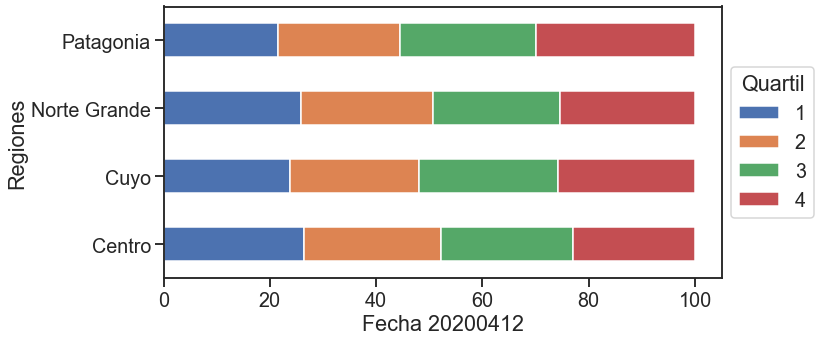

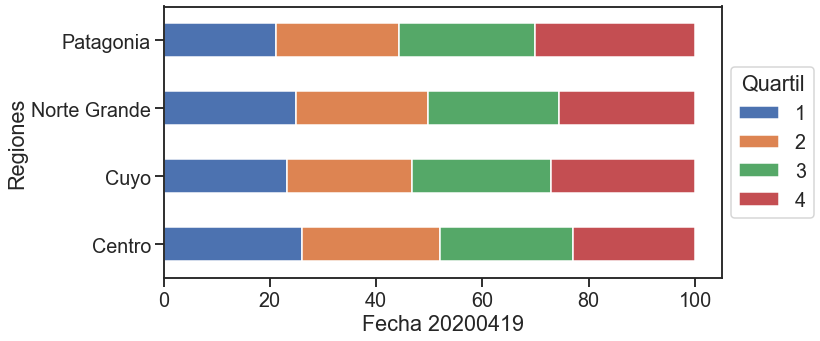

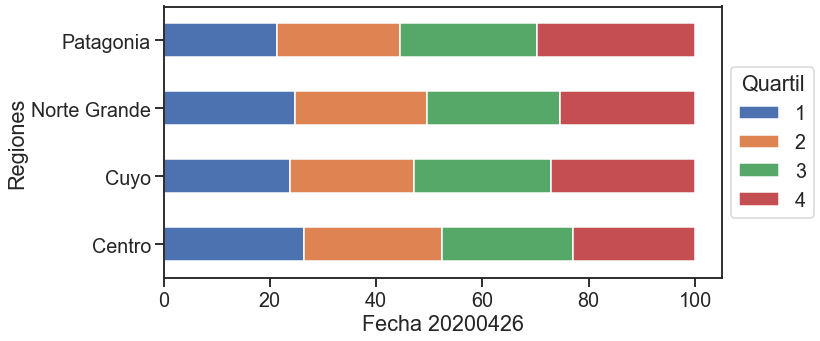

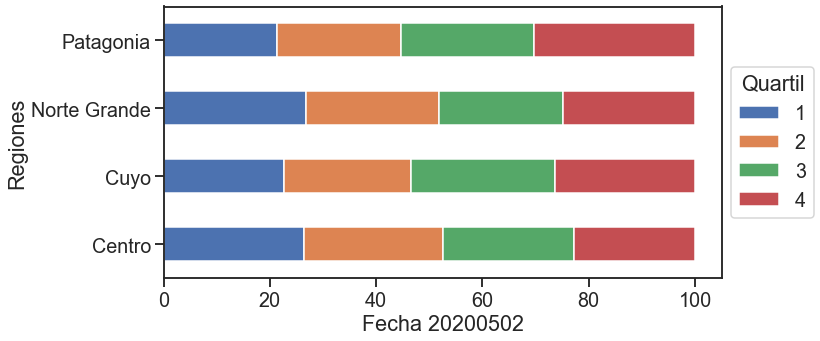

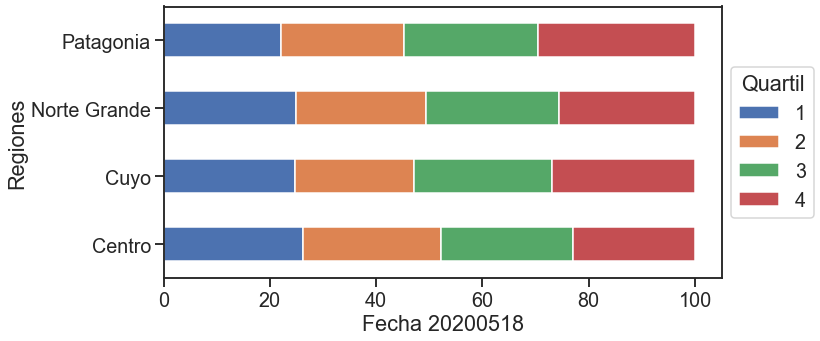

In [49]:
matplotlib.rc('figure', figsize=(10, 5))
for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plot = pd.crosstab(index=datasetNewAux['region'],
            columns=datasetNewAux['quartil']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha %i" %i)
    plot.set_ylabel("Regiones")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Quartil')

Distribución por rangos y por día

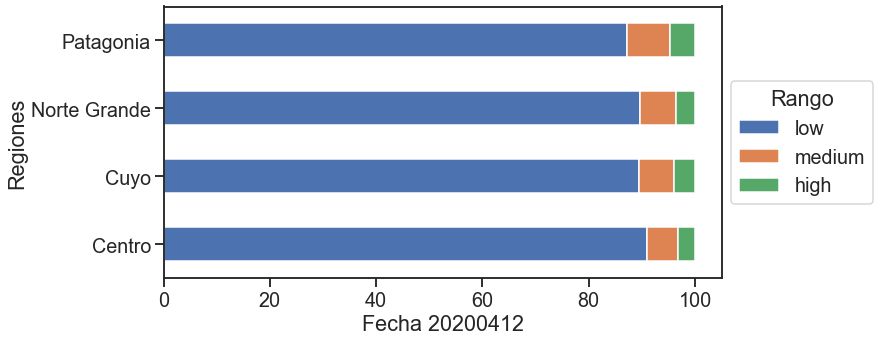

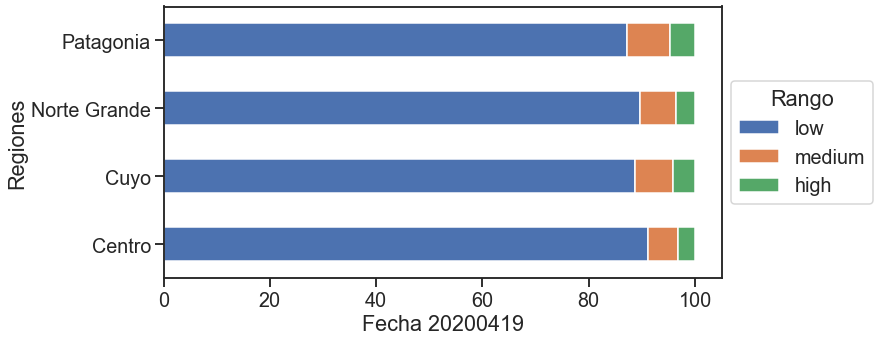

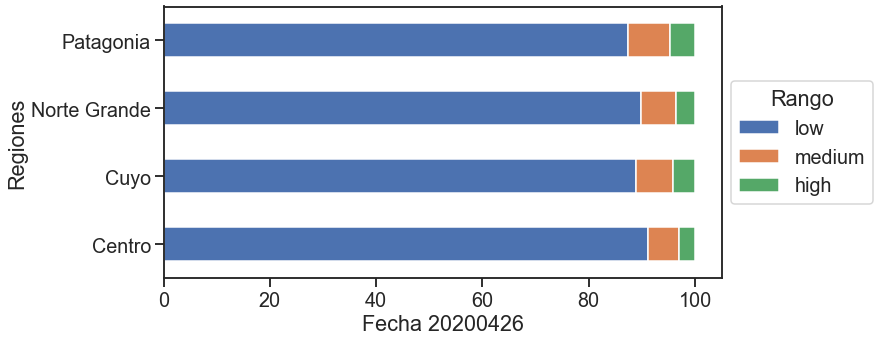

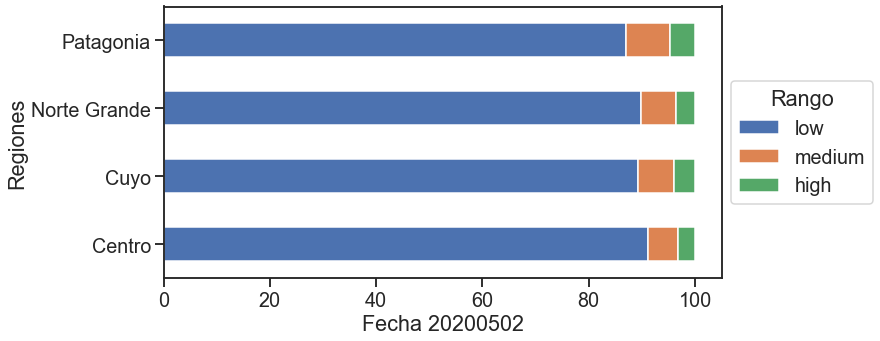

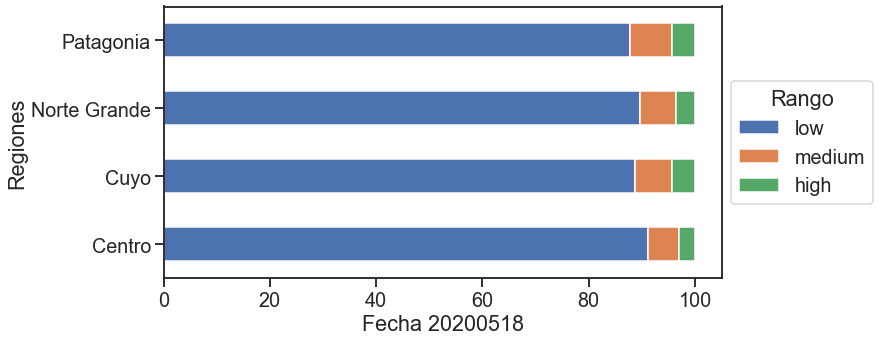

In [50]:
matplotlib.rc('figure', figsize=(10, 5))
for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plot = pd.crosstab(index=datasetNewAux['region'],
            columns=datasetNewAux['rango']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha %i" %i)
    plot.set_ylabel("Regiones")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Rango')
    

**Identificación de un bien númerico**

A fin de poder tener una comparativa de precios relativos procederemos a identificar un producto que se encuentre en todas las provincias 

In [51]:
prod_region_count = datasetNew.groupby(['producto_id','nom_provincia' ])['producto_id'].nunique().groupby('producto_id').count().reset_index(name='count')
bienNumerico=prod_region_count[(prod_region_count['count']==24)] 
bienNumerico.head()

producto_id  count
129  0000077900067     24
150  0000077903501     24
299  0000077941824     24
389  0000077956262     24
499  0000078923454     24

In [52]:
#Producto utilizado para bien numerido = Crema Dental Interdental Colgate
#Verificamos si el bien numérico se encuentra entre los productos que se encuentran en todas las regiones
idProducto='7793100111563'
bienNumerico[bienNumerico.producto_id==idProducto]

producto_id  count
42671  7793100111563     24

In [53]:
#Muestramos el nombre del producto seleccionado como bien numérico
datasetNew[datasetNew.producto_id==idProducto]

fecha sucursal_id    producto_id  \
320741   20200412    10-1-112  7793100111563   
320742   20200412    10-1-142  7793100111563   
320743   20200412    10-1-147  7793100111563   
320744   20200412    10-1-149  7793100111563   
320745   20200412    10-1-178  7793100111563   
...           ...         ...            ...   
2069260  20200518    9-3-5218  7793100111563   
2069261  20200518    9-3-5222  7793100111563   
2069262  20200518    9-3-5227  7793100111563   
2069263  20200518    9-3-5251  7793100111563   
2069264  20200518    9-3-5277  7793100111563   

                            nombre_sin_um  \
320741   Crema Dental Interdental Colgate   
320742   Crema Dental Interdental Colgate   
320743   Crema Dental Interdental Colgate   
320744   Crema Dental Interdental Colgate   
320745   Crema Dental Interdental Colgate   
...                                   ...   
2069260  Crema Dental Interdental Colgate   
2069261  Crema Dental Interdental Colgate   
2069262  Crema Dental Interdental Colgate   
2069263  Crema Dental Interdental Colgate   
2069264  Crema Dental Interdental Colgate   

                                   localidad     nom_provincia        region  \
320741                                 Salta             Salta  Norte Grande   
320742                            Río Grande  Tierra del Fuego     Patagonia   
320743                            Santa Rosa          La Pampa        Centro   
320744                             Bariloche         Río Negro     Patagonia   
320745   San Fernando del Valle de Catamarca         Catamarca  Norte Grande   
...                                      ...               ...           ...   
2069260                              ROSARIO          Santa Fe        Centro   
2069261                           GODOY CRUZ           Mendoza          Cuyo   
2069262                          YERBA BUENA           Tucumán  Norte Grande   
2069263                                SALTA             Salta  Norte Grande   
2069264                   COMODORO RIVADAVIA            Chubut     Patagonia   

                 comercioRazonSocial presentacion  precio  cantidad unidad  \
320741                      INC S.A.     180.0 gr   185.0     180.0     gr   
320742                      INC S.A.     180.0 gr   191.0     180.0     gr   
320743                      INC S.A.     180.0 gr   168.0     180.0     gr   
320744                      INC S.A.     180.0 gr   151.0     180.0     gr   
320745                      INC S.A.     180.0 gr   174.0     180.0     gr   
...                              ...          ...     ...       ...    ...   
2069260  Jumbo Retail Argentina S.A.     180.0 gr   175.0     180.0     gr   
2069261  Jumbo Retail Argentina S.A.     180.0 gr   154.0     180.0     gr   
2069262  Jumbo Retail Argentina S.A.     180.0 gr   150.0     180.0     gr   
2069263  Jumbo Retail Argentina S.A.     180.0 gr   180.0     180.0     gr   
2069264  Jumbo Retail Argentina S.A.     180.0 gr   182.0     180.0     gr   

           marca  PrecioXUnidad nuevaUnidad       media      desvio rango  \
320741   COLGATE        1027.78          kg  949.159048  109.065872   low   
320742   COLGATE        1061.11          kg  949.159048  109.065872   low   
320743   COLGATE         933.33          kg  949.159048  109.065872   low   
320744   COLGATE         838.89          kg  949.159048  109.065872   low   
320745   COLGATE         966.67          kg  949.159048  109.065872   low   
...          ...            ...         ...         ...         ...   ...   
2069260  COLGATE         972.22          kg  970.953587  104.648655   low   
2069261  COLGATE         855.56          kg  970.953587  104.648655   low   
2069262  COLGATE         833.33          kg  970.953587  104.648655   low   
2069263  COLGATE        1000.00          kg  970.953587  104.648655   low   
2069264  COLGATE        1011.11          kg  970.953587  104.648655   low   

        quartil  
320741        4  
320742        4  
320743        4  

Para el producto seleccionado como bien numérico obtenemos el promedio de PrecioXUnidad agrupado por fecha y nombre de provincia 

In [54]:
#Armamos un dataset con la media de PrecioXUnidad por fecha y provincia del bien numerico seleccionado
dfbn=datasetNew[(datasetNew.producto_id==idProducto)][['fecha','nom_provincia','PrecioXUnidad']].groupby(['fecha','nom_provincia'],as_index=False).agg(['mean'])
dfbn.columns = ['bienNumerico']
dfbn = dfbn.reset_index()
dfbn

fecha                    nom_provincia  bienNumerico
0    20200412                        Catamarca    942.030000
1    20200412                            Chaco    755.487500
2    20200412                           Chubut    931.036000
3    20200412  Ciudad Autónoma de Buenos Aires    920.275000
4    20200412                       Corrientes    890.275000
..        ...                              ...           ...
107  20200518                         San Juan    915.130000
108  20200518                       Santa Cruz   1122.220000
109  20200518                         Santa Fe    965.598000
110  20200518                 Tierra del Fuego   1061.110000
111  20200518                          Tucumán    854.115714

[112 rows x 3 columns]

Agregamos el precio relativo de cada producto al conjunto de datos

In [55]:
#Agregamos al dataset una nueva columna con el precio relativo 
datasetPR=pd.merge(left=datasetNew,right=dfbn,how='inner',left_on=['fecha','nom_provincia'],right_on =['fecha','nom_provincia'])
datasetPR['precioRelativo']=datasetPR.PrecioXUnidad/datasetPR.bienNumerico
datasetPR.head()

fecha sucursal_id    producto_id  \
0  20200412     2-1-014  0000000001663   
1  20200412   11-5-1057  0000042126560   
2  20200412   11-5-1057  0000042231486   
3  20200412     10-1-45  0000042277132   
4  20200412    10-2-146  0000042277132   

                                       nombre_sin_um           localidad  \
0                         Radicheta Atada La Anonima       Puerto Madryn   
1  Desodorante Atitranspirante Nivea Pearl & Beau...  COMODORO RIVADAVIA   
2                Gel Exfoliante en Pomo Nivea Visage  COMODORO RIVADAVIA   
3   Desmaquillador de Ojos Bifasico en Botella Nivea              Trelew   
4   Desmaquillador de Ojos Bifasico en Botella Nivea              Trelew   

  nom_provincia     region                             comercioRazonSocial  \
0        Chubut  Patagonia  S.A. Importadora y Exportadora de la Patagonia   
1        Chubut  Patagonia                       Wal Mart Argentina S.R.L.   
2        Chubut  Patagonia                       Wal Mart Argentina S.R.L.   
3        Chubut  Patagonia                                        INC S.A.   
4        Chubut  Patagonia                                        INC S.A.   

  presentacion  precio  ...  unidad       marca PrecioXUnidad  nuevaUnidad  \
0       1.0 un    29.9  ...      un  LA ANÓNIMA          29.9           un   
1      40.0 ml   185.8  ...      ml       NIVEA        4645.0           lt   
2      75.0 ml   269.1  ...      ml       NIVEA        3588.0           lt   
3     125.0 ml   499.0  ...      ml       NIVEA        3992.0           lt   
4     125.0 ml   349.3  ...      ml       NIVEA        2794.4           lt   

         media      desvio   rango quartil bienNumerico  precioRelativo  
0    29.900000    0.000000     low       1      931.036        0.032115  
1  4375.971154  336.476863    high       4      931.036        4.989066  
2  3335.108409  357.026477    high       4      931.036        3.853771  
3  3585.130000  609.270230    high       4      931.036        4.287697  
4  3585.130000  609.270230  medium       4      931.036        3.001388  

[5 rows x 21 columns]

In [56]:
datasetPR.shape

(2152719, 21)

In [57]:
#Verificamos que en el merge left join no perdemos datos respecto del conjunto de datos original y a partir 
#de este momento ttrabajamos con datasetPR
len(datasetNew)-len(datasetPR)

28068

In [58]:
datasetPR.isna().sum().to_frame().sort_values(0, ascending = False).reset_index()

index  0
0                 fecha  0
1                unidad  0
2          bienNumerico  0
3               quartil  0
4                 rango  0
5                desvio  0
6                 media  0
7           nuevaUnidad  0
8         PrecioXUnidad  0
9                 marca  0
10             cantidad  0
11          sucursal_id  0
12               precio  0
13         presentacion  0
14  comercioRazonSocial  0
15               region  0
16        nom_provincia  0
17            localidad  0
18        nombre_sin_um  0
19          producto_id  0
20       precioRelativo  0

**Análisis de dispersión del bien numérico en todas las suursales**

In [59]:
datasetNew[datasetNew.producto_id==idProducto]

fecha sucursal_id    producto_id  \
320741   20200412    10-1-112  7793100111563   
320742   20200412    10-1-142  7793100111563   
320743   20200412    10-1-147  7793100111563   
320744   20200412    10-1-149  7793100111563   
320745   20200412    10-1-178  7793100111563   
...           ...         ...            ...   
2069260  20200518    9-3-5218  7793100111563   
2069261  20200518    9-3-5222  7793100111563   
2069262  20200518    9-3-5227  7793100111563   
2069263  20200518    9-3-5251  7793100111563   
2069264  20200518    9-3-5277  7793100111563   

                            nombre_sin_um  \
320741   Crema Dental Interdental Colgate   
320742   Crema Dental Interdental Colgate   
320743   Crema Dental Interdental Colgate   
320744   Crema Dental Interdental Colgate   
320745   Crema Dental Interdental Colgate   
...                                   ...   
2069260  Crema Dental Interdental Colgate   
2069261  Crema Dental Interdental Colgate   
2069262  Crema Dental Interdental Colgate   
2069263  Crema Dental Interdental Colgate   
2069264  Crema Dental Interdental Colgate   

                                   localidad     nom_provincia        region  \
320741                                 Salta             Salta  Norte Grande   
320742                            Río Grande  Tierra del Fuego     Patagonia   
320743                            Santa Rosa          La Pampa        Centro   
320744                             Bariloche         Río Negro     Patagonia   
320745   San Fernando del Valle de Catamarca         Catamarca  Norte Grande   
...                                      ...               ...           ...   
2069260                              ROSARIO          Santa Fe        Centro   
2069261                           GODOY CRUZ           Mendoza          Cuyo   
2069262                          YERBA BUENA           Tucumán  Norte Grande   
2069263                                SALTA             Salta  Norte Grande   
2069264                   COMODORO RIVADAVIA            Chubut     Patagonia   

                 comercioRazonSocial presentacion  precio  cantidad unidad  \
320741                      INC S.A.     180.0 gr   185.0     180.0     gr   
320742                      INC S.A.     180.0 gr   191.0     180.0     gr   
320743                      INC S.A.     180.0 gr   168.0     180.0     gr   
320744                      INC S.A.     180.0 gr   151.0     180.0     gr   
320745                      INC S.A.     180.0 gr   174.0     180.0     gr   
...                              ...          ...     ...       ...    ...   
2069260  Jumbo Retail Argentina S.A.     180.0 gr   175.0     180.0     gr   
2069261  Jumbo Retail Argentina S.A.     180.0 gr   154.0     180.0     gr   
2069262  Jumbo Retail Argentina S.A.     180.0 gr   150.0     180.0     gr   
2069263  Jumbo Retail Argentina S.A.     180.0 gr   180.0     180.0     gr   
2069264  Jumbo Retail Argentina S.A.     180.0 gr   182.0     180.0     gr   

           marca  PrecioXUnidad nuevaUnidad       media      desvio rango  \
320741   COLGATE        1027.78          kg  949.159048  109.065872   low   
320742   COLGATE        1061.11          kg  949.159048  109.065872   low   
320743   COLGATE         933.33          kg  949.159048  109.065872   low   
320744   COLGATE         838.89          kg  949.159048  109.065872   low   
320745   COLGATE         966.67          kg  949.159048  109.065872   low   
...          ...            ...         ...         ...         ...   ...   
2069260  COLGATE         972.22          kg  970.953587  104.648655   low   
2069261  COLGATE         855.56          kg  970.953587  104.648655   low   
2069262  COLGATE         833.33          kg  970.953587  104.648655   low   
2069263  COLGATE        1000.00          kg  970.953587  104.648655   low   
2069264  COLGATE        1011.11          kg  970.953587  104.648655   low   

        quartil  
320741        4  
320742        4  
320743        4  

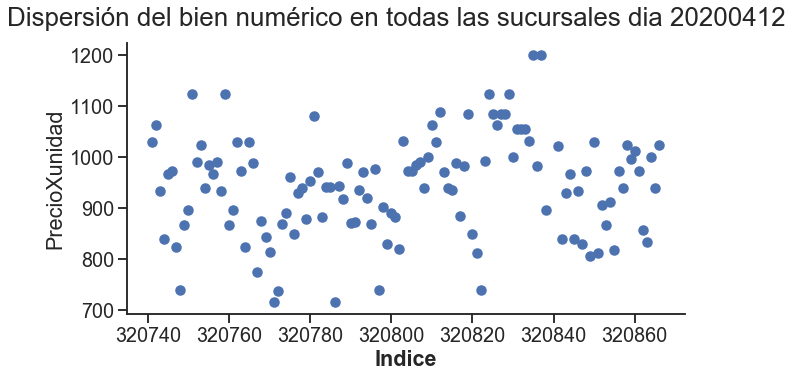

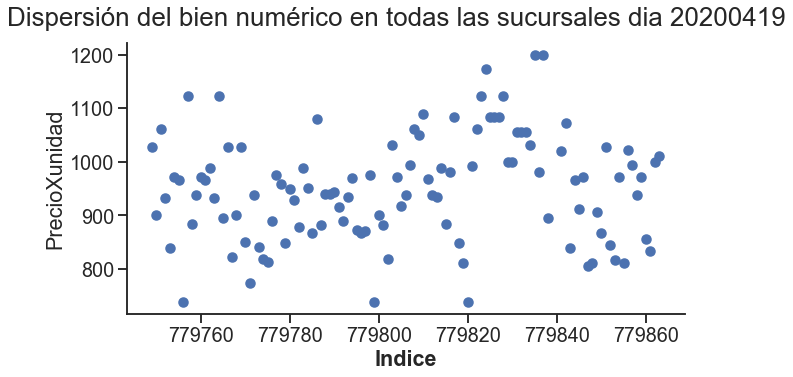

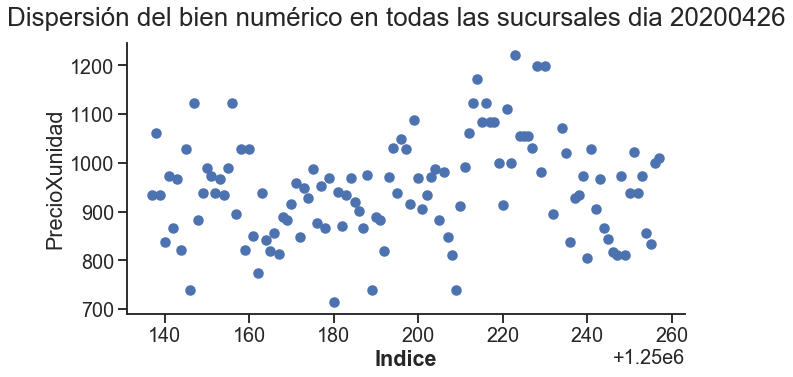

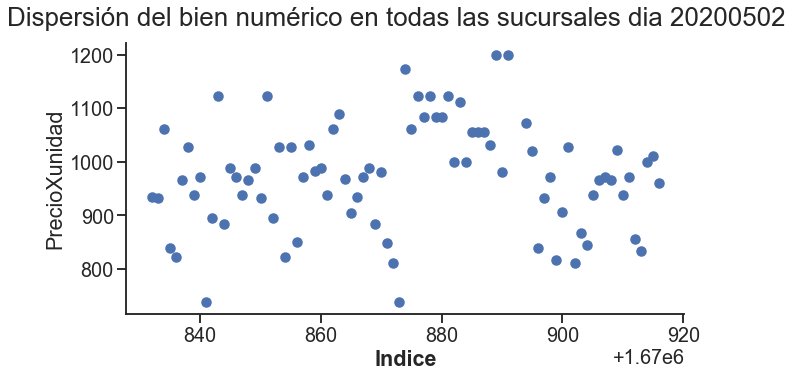

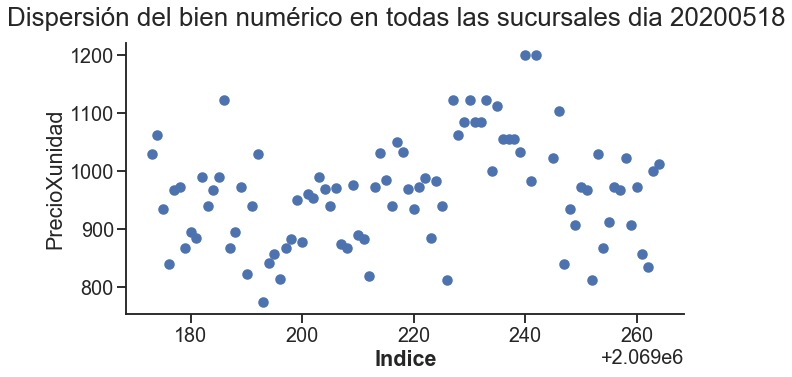

In [60]:
bins_pf=15  #Bines para precio
matplotlib.rc('figure', figsize=(10, 5))

datasetNewAux=datasetNew[datasetNew.producto_id==idProducto]

for i in pd.Series(datasetNewAux.fecha.unique()).sort_values():
    dia = (datasetNewAux.fecha == i)
    datasetScatter=datasetNewAux[dia]
    plt.scatter(datasetScatter.index, datasetScatter.PrecioXUnidad, color="b")
    plt.suptitle('Dispersión del bien numérico en todas las sucursales dia %i'  %i)
    plt.xlabel('Indice',weight='bold')
    plt.ylabel('PrecioXunidad')
    sns.despine()
    plt.show()

Como se observa para el bien numérico selecionado para todos los dias los valores informados en las sucursales a nivel país oscilan entre $700 a $1200

**Análisis de correlaciones**

In [61]:
region_rango_pivot = datasetNew.groupby(['region','rango']).size().reset_index(name='counts').pivot('region', 'rango', 'counts')

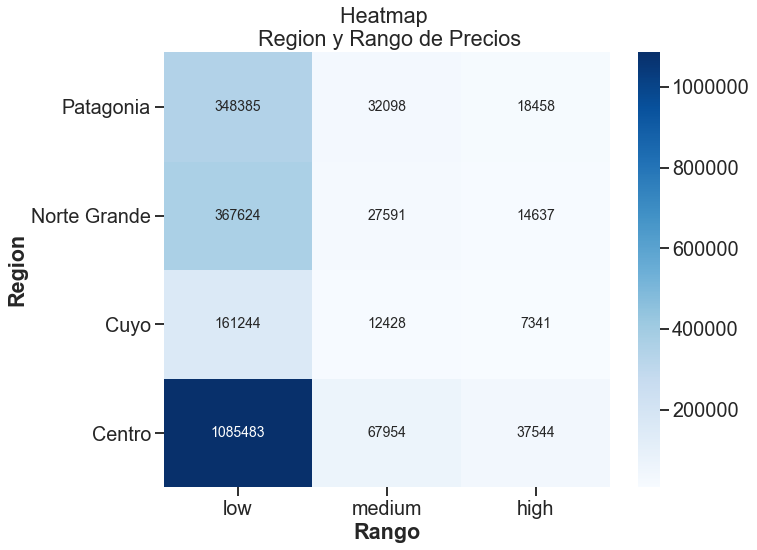

In [62]:

plt.figure(figsize=(10,8))
hm01 = sns.heatmap(region_rango_pivot, annot=True, fmt='d', annot_kws={"size":14}, cmap="Blues")
hm01.invert_yaxis()
plt.title("Heatmap \n Region y Rango de Precios")
plt.xlabel("Rango", weight='bold')
plt.ylabel("Region", weight='bold')
plt.show()

Como se observa en el mapa de calor en todas las regiones la mayor cantidad de productos informados pertenecen al rango bajo de PrecioXUnidad para todo el conjunto de datos.

In [63]:
provincia_rango_pivot = datasetNew.groupby(['nom_provincia','rango']).size().reset_index(name='counts').pivot('nom_provincia', 'rango', 'counts')

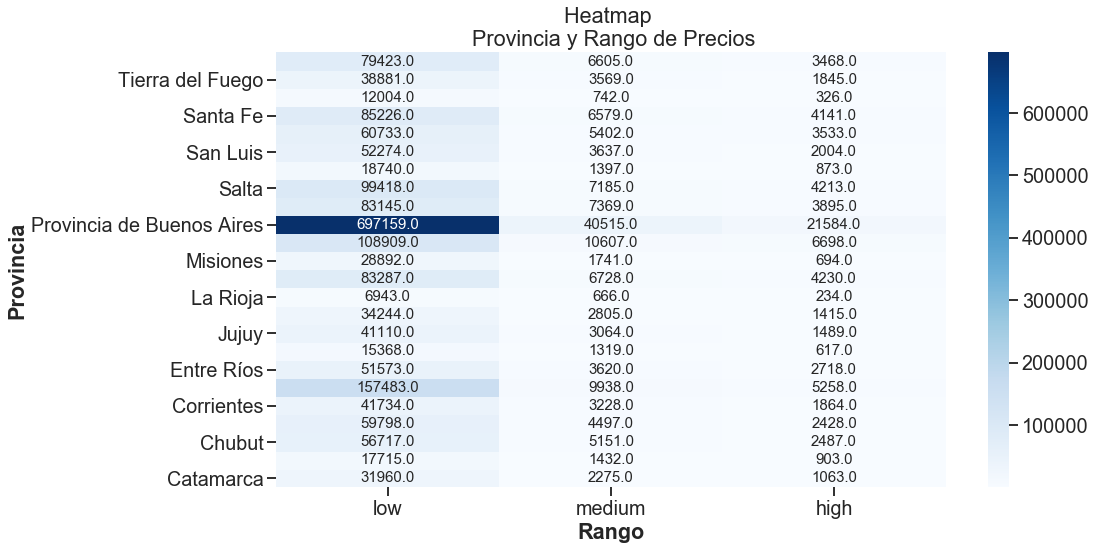

In [64]:
plt.figure(figsize=(15,8))
hm01 = sns.heatmap(provincia_rango_pivot, annot=True, fmt='.1f', annot_kws={"size":15}, cmap="Blues")
hm01.invert_yaxis()
plt.title("Heatmap \n Provincia y Rango de Precios")
plt.xlabel("Rango", weight='bold')
plt.ylabel("Provincia", weight='bold')
plt.show()

Como se observa en el mapa de calor en todas las provincias también la mayor cantidad de productos informados pertenecen al rango bajo de PrecioXUnidad para todo el conjunto de datos.

In [65]:
negocio_rango_pivot = datasetNew.groupby(['comercioRazonSocial','rango']).size().reset_index(name='counts').pivot('comercioRazonSocial', 'rango', 'counts').dropna()

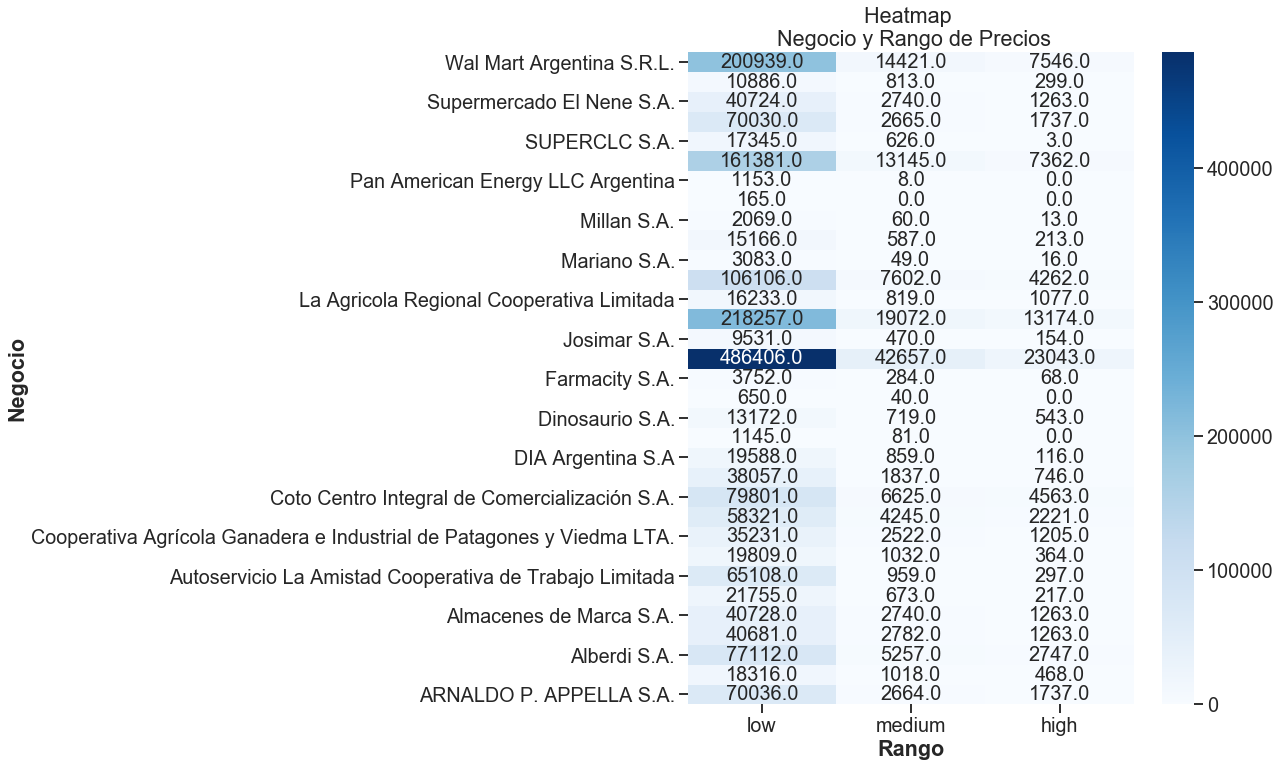

In [66]:
plt.figure(figsize=(10,12))
hm01 = sns.heatmap(negocio_rango_pivot, annot=True, fmt='.1f', annot_kws={"size":20}, cmap="Blues")
hm01.invert_yaxis()
plt.title("Heatmap \n Negocio y Rango de Precios")
plt.xlabel("Rango", weight='bold')
plt.ylabel("Negocio", weight='bold')
plt.show()

Como se observa Josimar S.A. es el que presenta mayor cantidad de productos informados en el rango de precios bajos.

**3-RESPUESTAS OBLIGATORIAS**

**Cuál es la correlación entre precios nominales y relativos? Nos sirve de algo este dato?**

Los precios relativos están constituidos a partir de los precios nomiales dividido el precio de un bien numérico existente en las 24 provincias para todos los dias del dataset. La variacion positiva o negativa de un precio relativo en el tiempo nos da una dimensión del costo de oportunidad de resignar la compra del bien numerico en pos de comprar otro producto.   

**Qué productos están en todas las provincias?**

In [67]:
#Productos que se encuentran en todas las provincias
prod_provincia_count = datasetPR.groupby(['nom_provincia','nombre_sin_um' ])['nombre_sin_um'].nunique().groupby('nombre_sin_um').count().reset_index(name='count')
prodProvincia=prod_provincia_count[(prod_provincia_count['count']==24)] 
prodProvincia.head(10)

nombre_sin_um  count
24                    Aceite Bebe Puro Johnsons Baby     24
25   Aceite Bebe con Aloe y Vitamina E Johnsons Baby     24
86     Aceite Rocio Vegetal Clasico Aerosol Cocinero     24
142                      Aceite de Girasol Cañuelas     24
163                         Aceite de Girasol Natura     24
191                            Aceite de Maiz Mazola     24
286              Aceite de Oliva Extra Virgen Nucete     24
769              Aceitunas Verdes en Salmuera Nucete     24
840                          Aceto Balsamico Favinco     24
864                Aceto Balsamico Reduccion Casalta     24

**Cómo podemos medir la dispersión de precios? Encontrar una métrica y un elemento de visualización.**

La dispersión de percios se puede medir de diferentes formas. Una forma sería teniendo en cuenta sus medias y desvios. Aquellos productos que tengan un desvío mayor tendrán mayor dispersión.  Si tomamos en cuenta 3 desvios estandar de la media podríamos encontrar los rangos entre los valores mínimos y máximos sin outlier que representan el rango de precios para un producto determinado. Otra forma podría ser teniendo en cuenta quartiles. En ese sentido el grafico de boxplot es una buena opción para verificar dispersión. A continuación se presenta el boxplot del producto que tomamos como bien númerico por fecha y por región.

In [68]:
dfbienNumerico=datasetPR[datasetPR.producto_id==idProducto]

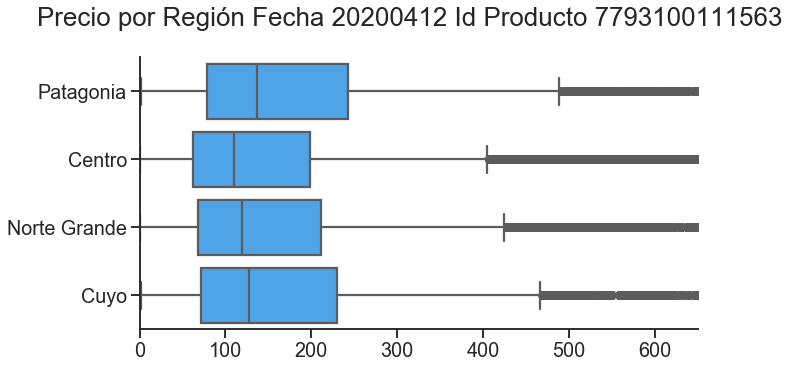

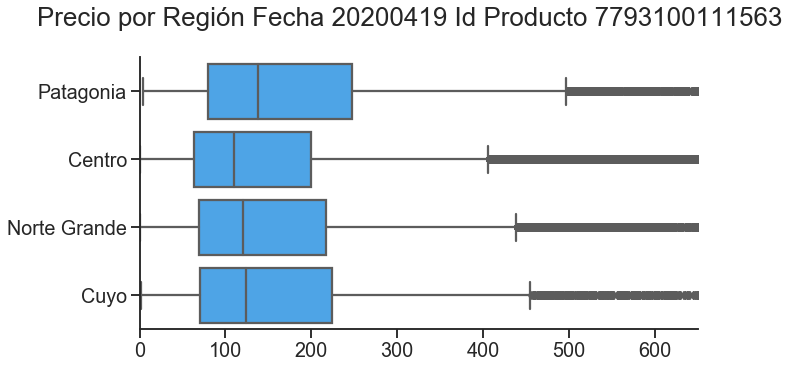

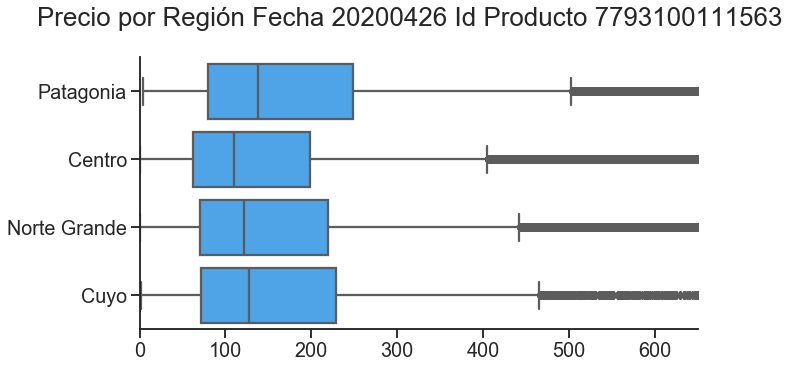

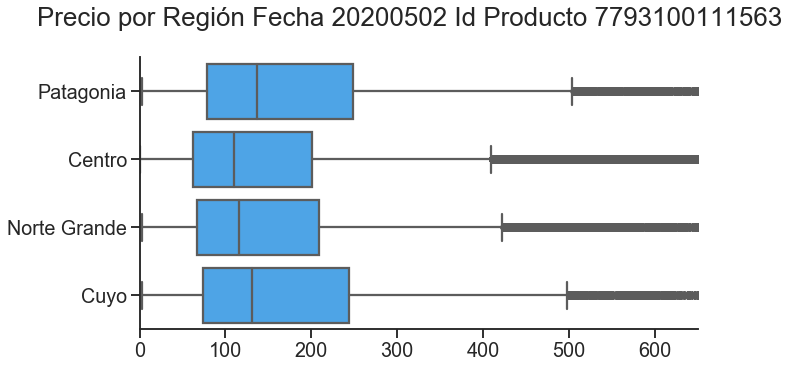

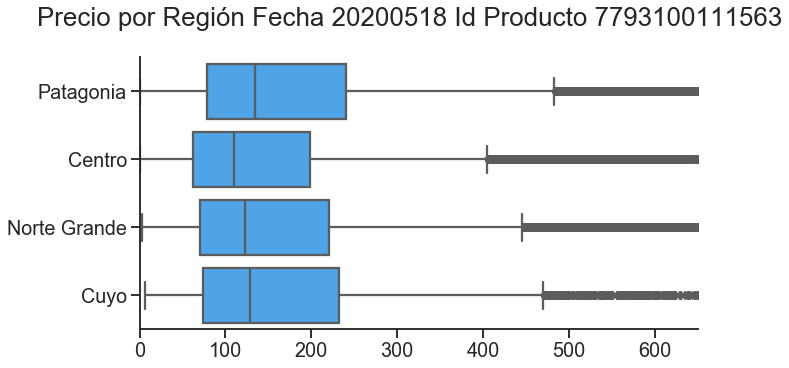

In [69]:
OrdReg = dfbienNumerico.groupby('region').mean().reset_index().sort_values('precio',ascending=False)['region']

for i in pd.Series(dfbienNumerico.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plt.figure(figsize=(10,5))
    plt.suptitle('Precio por Región Fecha %i' %i+' Id Producto '+idProducto, y=1.02)
    sns.boxplot(data=datasetNewAux,
            x='precio', y='region', color=BLUE, order=OrdReg)
    plt.xlabel('')
    plt.ylabel('')
    plt.subplots_adjust(wspace=0.1)
    plt.xlim(0,650)
    sns.despine() 

Como se observa para el análisis de boxplot del bien numérico que se acaba de graficar los precios con mayor dispersión, mediana y valores máximos corresponden a la región Patagonia seguido por Cuyo.

**Qué tipos de productos se encuentran entre los más caros? En qué provincia se encuentran mayoritariamente?**

In [70]:
datasetPR.sort_values(['PrecioXUnidad'], ascending=[False])

fecha sucursal_id    producto_id  \
2092953  20200518      29-1-5  7790580117757   
28804    20200412    9-3-5202  0041554443493   
599746   20200419    9-3-5202  0041554443493   
96692    20200412      49-1-2  7790577000246   
1044447  20200426      49-1-2  7790577000246   
...           ...         ...            ...   
1090290  20200426      25-1-1  7793008999515   
1543812  20200502      25-1-1  7793008999515   
1543813  20200502      25-1-1  7793008999539   
161471   20200412      25-1-1  7793008999515   
1922989  20200518      25-1-1  7793008999515   

                                           nombre_sin_um   localidad  \
2092953  Huevo de Chocolate con Leche Toy Story Arcor 50    Barracas   
28804          Mascara para Pestañas Maybelline Falsies    MARTINEZ   
599746         Mascara para Pestañas Maybelline Falsies    MARTINEZ   
96692      Vino Tinto Estuche Madera San Felipe 3 Un 750  9 de Julio   
1044447    Vino Tinto Estuche Madera San Felipe 3 Un 750  9 de Julio   
...                                                  ...         ...   
1090290                 Shampoo Issue Hydrax Sachet Caja    LA PLATA   
1543812                 Shampoo Issue Hydrax Sachet Caja    LA PLATA   
1543813       Acondicionador Hydrax Sachet en Caja Issue    LA PLATA   
161471                  Shampoo Issue Hydrax Sachet Caja    LA PLATA   
1922989                 Shampoo Issue Hydrax Sachet Caja    LA PLATA   

                           nom_provincia  region  \
2092953  Ciudad Autónoma de Buenos Aires  Centro   
28804          Provincia de Buenos Aires  Centro   
599746         Provincia de Buenos Aires  Centro   
96692          Provincia de Buenos Aires  Centro   
1044447        Provincia de Buenos Aires  Centro   
...                                  ...     ...   
1090290        Provincia de Buenos Aires  Centro   
1543812        Provincia de Buenos Aires  Centro   
1543813        Provincia de Buenos Aires  Centro   
161471         Provincia de Buenos Aires  Centro   
1922989        Provincia de Buenos Aires  Centro   

                                       comercioRazonSocial presentacion  \
2092953                                       Josimar S.A.       1.0 gr   
28804                          Jumbo Retail Argentina S.A.       2.0 gr   
599746                         Jumbo Retail Argentina S.A.       2.0 gr   
96692                              ARNALDO P. APPELLA S.A.      2.25 cc   
1044447                            ARNALDO P. APPELLA S.A.      2.25 cc   
...                                                    ...          ...   
1090290  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
1543812  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
1543813  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
161471   Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
1922989  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   

         precio  ...  unidad       marca PrecioXUnidad  nuevaUnidad  \
2092953  445.00  ...      gr       ARCOR     445000.00           kg   
28804    815.00  ...      gr  MAYBELLINE     407500.00           kg   
599746   815.00  ...      gr  MAYBELLINE     407500.00           kg   
96692    869.00  ...      cc  SAN FELIPE     386222.22           lt   
1044447  869.00  ...      cc  SAN FELIPE     386222.22           lt   
...         ...  ...     ...         ...           ...          ...   
1090290    0.39  ...      un       ISSUE          0.00           un   
1543812    0.39  ...      un       ISSUE          0.00           un   
1543813    0.39  ...      un       ISSUE          0.00           un   
161471     0.39  ...      un       ISSUE          0.00           un   
1922989    0.39  ...      un       ISSUE          0.00           un   

             media         desvio  rango quartil bienNumerico  precioRelativo  
2092953  253202.50  116567.160979   high       4   970.500000      458.526533  
28804    407500.00       0.0000

Encontramos precios excesivamente altos en chocolate y mascaras para pestañas lo cual nos hace suponer que  podría haber datos erroneos en la presentación de estos productos. Sacandondolos del análisis, se observa que los productos con mayores valores corresponden a bebidas alcholicas y principalmente se encuentran en la región Centro en la provincia de Buenos Aires.

**Qué tipos de productos se encuentran entre los más baratos? En qué provincia se encuentran mayoritariamente?**

In [71]:
datasetPR.sort_values(['PrecioXUnidad'], ascending=[True])

fecha sucursal_id    producto_id  \
1543813  20200502      25-1-1  7793008999539   
703486   20200419      25-1-1  7793008999515   
1090290  20200426      25-1-1  7793008999515   
161471   20200412      25-1-1  7793008999515   
161472   20200412      25-1-1  7793008999539   
...           ...         ...            ...   
652211   20200419      49-1-2  7790577000246   
1873351  20200518      49-1-2  7790577000246   
28804    20200412    9-3-5202  0041554443493   
599746   20200419    9-3-5202  0041554443493   
2092953  20200518      29-1-5  7790580117757   

                                           nombre_sin_um   localidad  \
1543813       Acondicionador Hydrax Sachet en Caja Issue    LA PLATA   
703486                  Shampoo Issue Hydrax Sachet Caja    LA PLATA   
1090290                 Shampoo Issue Hydrax Sachet Caja    LA PLATA   
161471                  Shampoo Issue Hydrax Sachet Caja    LA PLATA   
161472        Acondicionador Hydrax Sachet en Caja Issue    LA PLATA   
...                                                  ...         ...   
652211     Vino Tinto Estuche Madera San Felipe 3 Un 750  9 de Julio   
1873351    Vino Tinto Estuche Madera San Felipe 3 Un 750  9 de Julio   
28804          Mascara para Pestañas Maybelline Falsies    MARTINEZ   
599746         Mascara para Pestañas Maybelline Falsies    MARTINEZ   
2092953  Huevo de Chocolate con Leche Toy Story Arcor 50    Barracas   

                           nom_provincia  region  \
1543813        Provincia de Buenos Aires  Centro   
703486         Provincia de Buenos Aires  Centro   
1090290        Provincia de Buenos Aires  Centro   
161471         Provincia de Buenos Aires  Centro   
161472         Provincia de Buenos Aires  Centro   
...                                  ...     ...   
652211         Provincia de Buenos Aires  Centro   
1873351        Provincia de Buenos Aires  Centro   
28804          Provincia de Buenos Aires  Centro   
599746         Provincia de Buenos Aires  Centro   
2092953  Ciudad Autónoma de Buenos Aires  Centro   

                                       comercioRazonSocial presentacion  \
1543813  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
703486   Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
1090290  Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
161471   Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
161472   Autoservicio La Amistad Cooperativa de Trabajo...     500.0 un   
...                                                    ...          ...   
652211                             ARNALDO P. APPELLA S.A.      2.25 cc   
1873351                            ARNALDO P. APPELLA S.A.      2.25 cc   
28804                          Jumbo Retail Argentina S.A.       2.0 gr   
599746                         Jumbo Retail Argentina S.A.       2.0 gr   
2092953                                       Josimar S.A.       1.0 gr   

         precio  ...  unidad       marca PrecioXUnidad  nuevaUnidad  \
1543813    0.39  ...      un       ISSUE          0.00           un   
703486     0.39  ...      un       ISSUE          0.00           un   
1090290    0.39  ...      un       ISSUE          0.00           un   
161471     0.39  ...      un       ISSUE          0.00           un   
161472     0.39  ...      un       ISSUE          0.00           un   
...         ...  ...     ...         ...           ...          ...   
652211   869.00  ...      cc  SAN FELIPE     386222.22           lt   
1873351  869.00  ...      cc  SAN FELIPE     386222.22           lt   
28804    815.00  ...      gr  MAYBELLINE     407500.00           kg   
599746   815.00  ...      gr  MAYBELLINE     407500.00           kg   
2092953  445.00  ...      gr       ARCOR     445000.00           kg   

             media         desvio  rango quartil bienNumerico  precioRelativo  
1543813       0.00       0.000000    low       1  1037.653846        0.000000  
703486        3.16       3.1600

Entre los más baratos se encuentran acondicionadores y shanpoo en la Provincia de Buenos Aires.

**Cómo se distribuyen los precios por provincia y cadena de proveedor?**

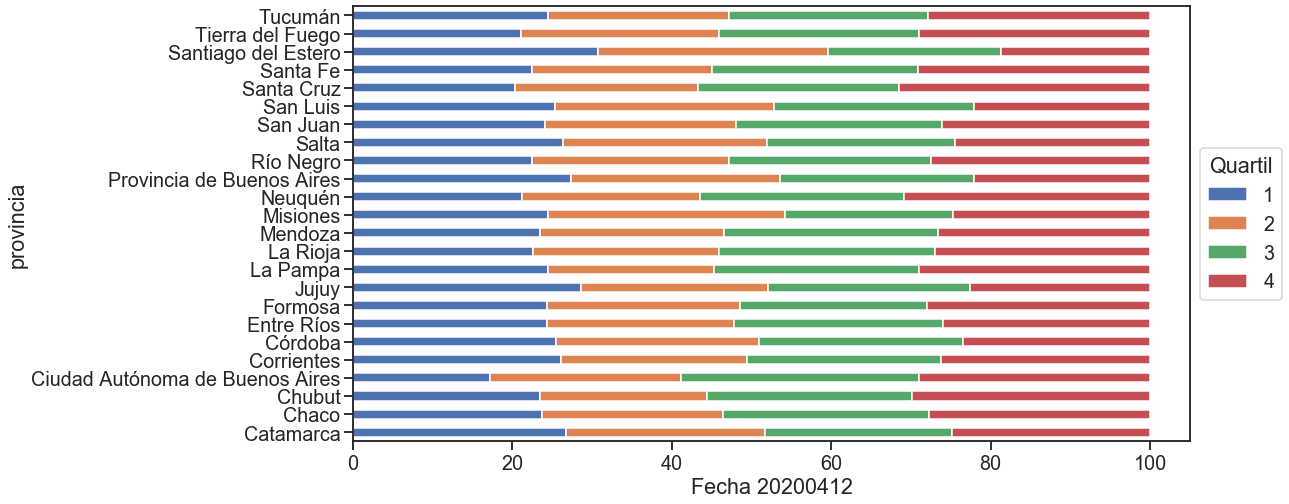

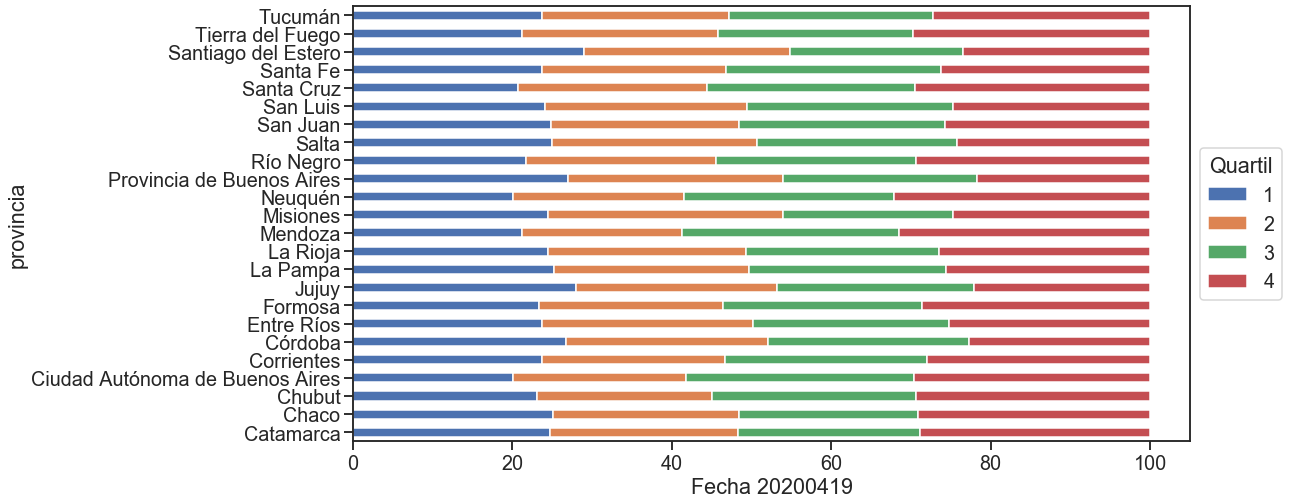

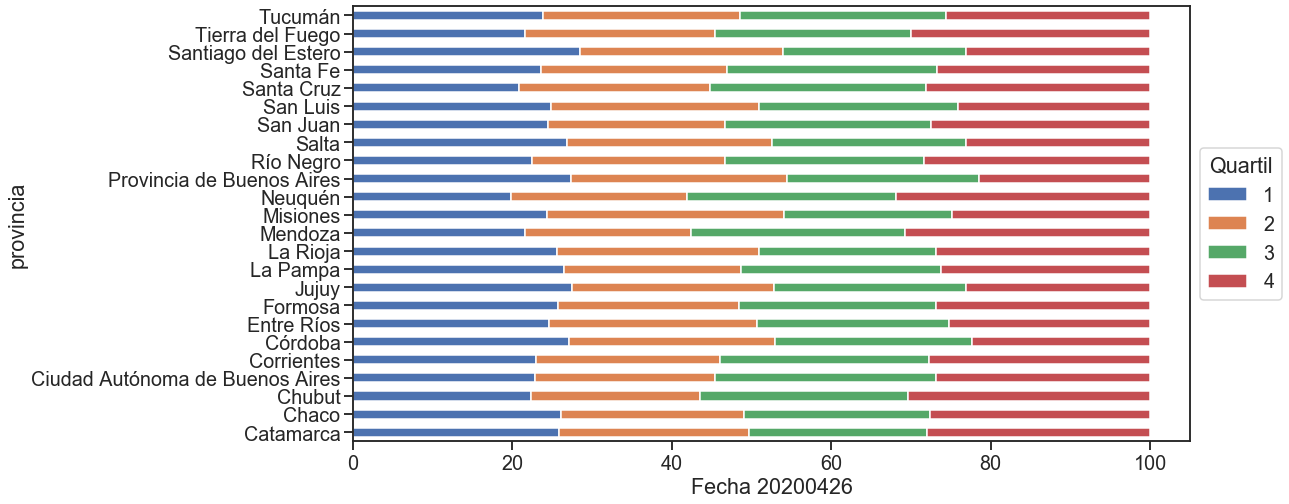

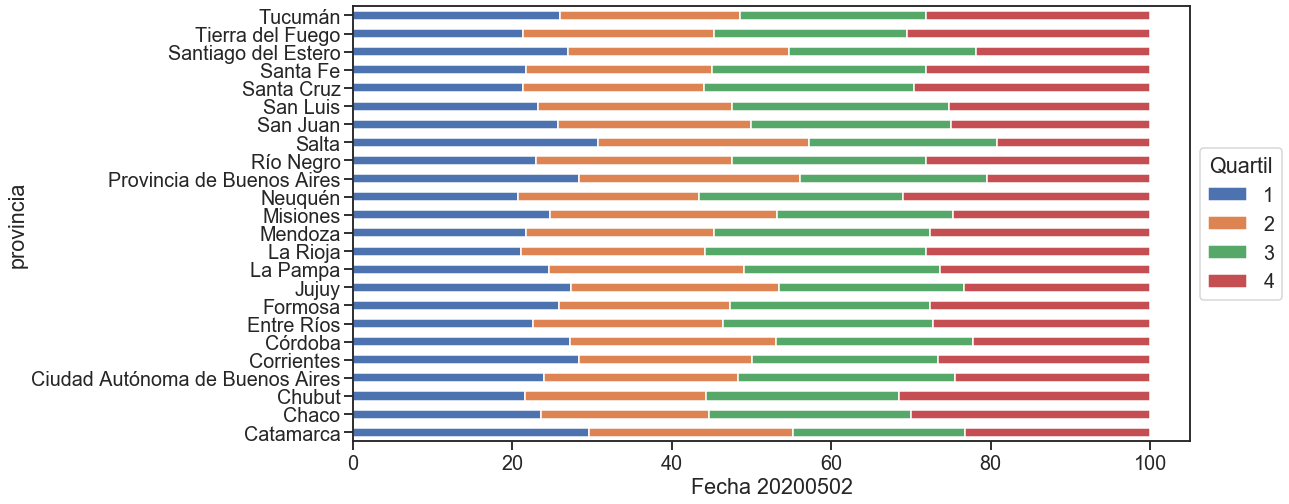

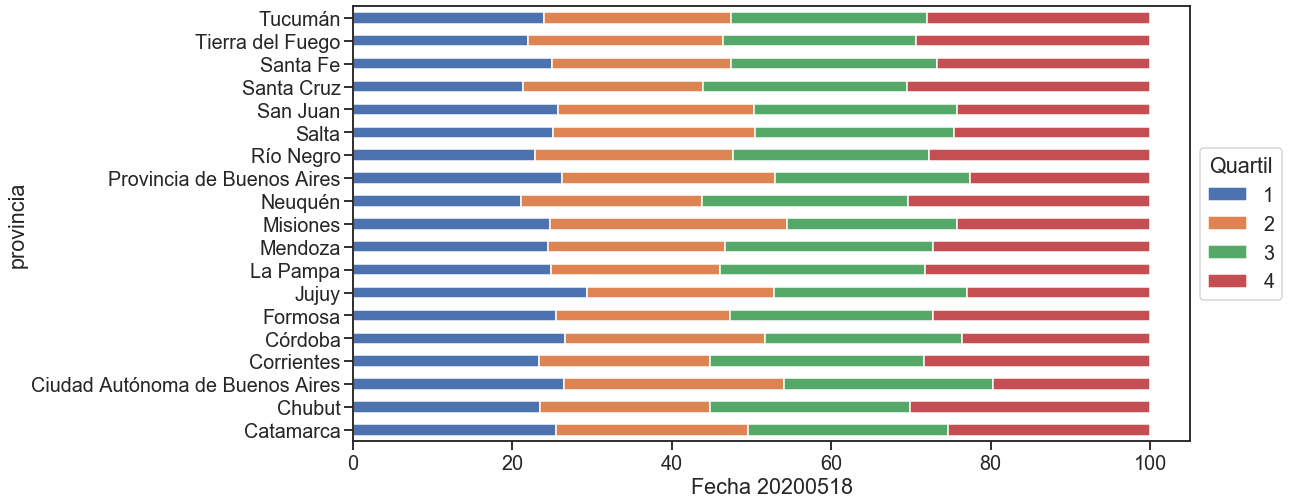

In [72]:
#Distribución del precio en cuartiles por fecha para cada provincia 
matplotlib.rc('figure', figsize=(15, 8))
for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plot = pd.crosstab(index=datasetNewAux['nom_provincia'],
            columns=datasetNewAux['quartil']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha %i" %i)
    plot.set_ylabel("provincia")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Quartil')

**Nota:** Los gráficos representan la distribución del precio en quartiles para cada provincia en una fecha determinada.

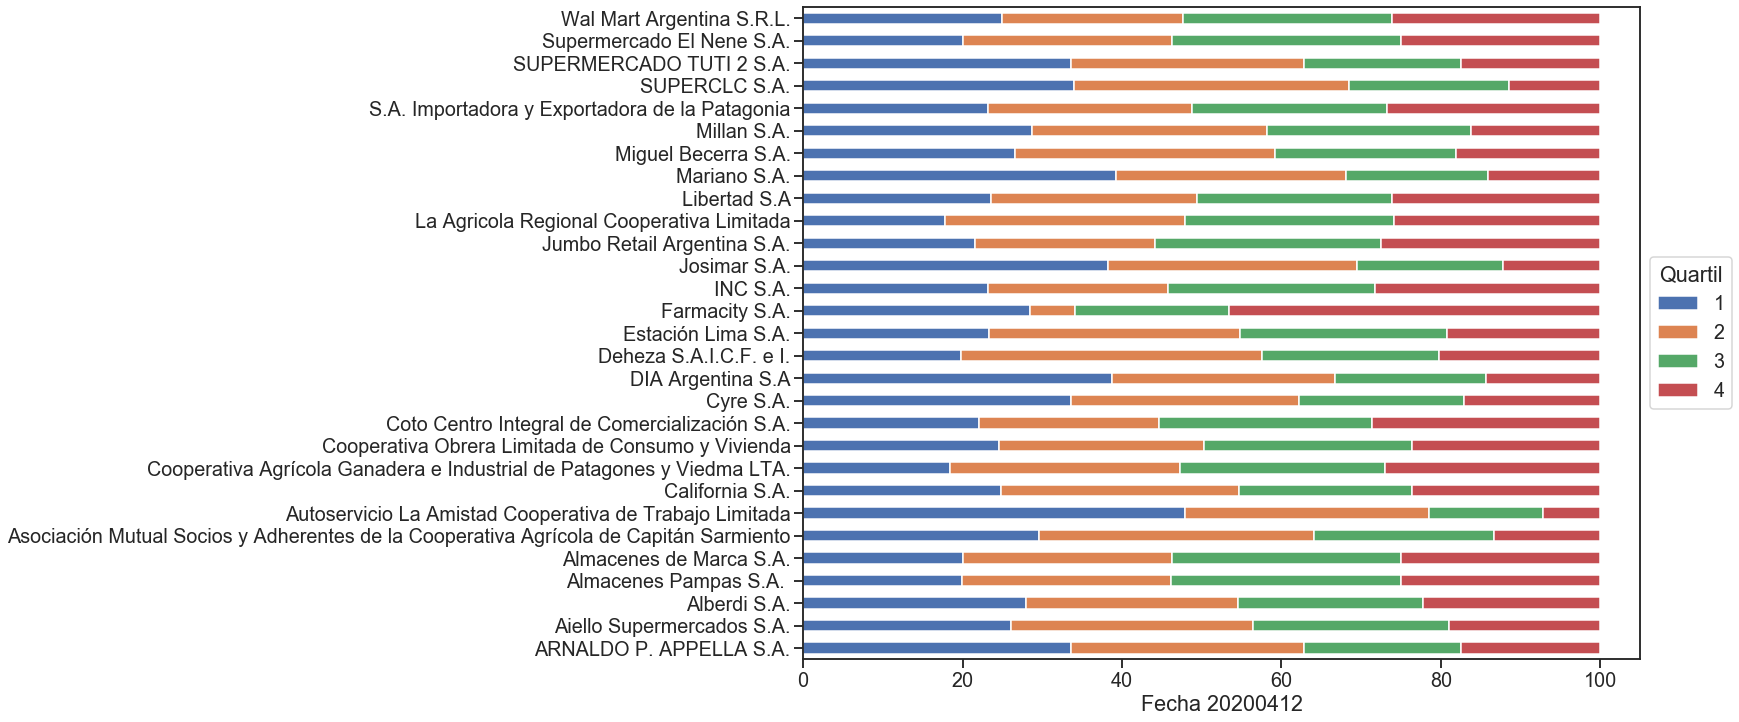

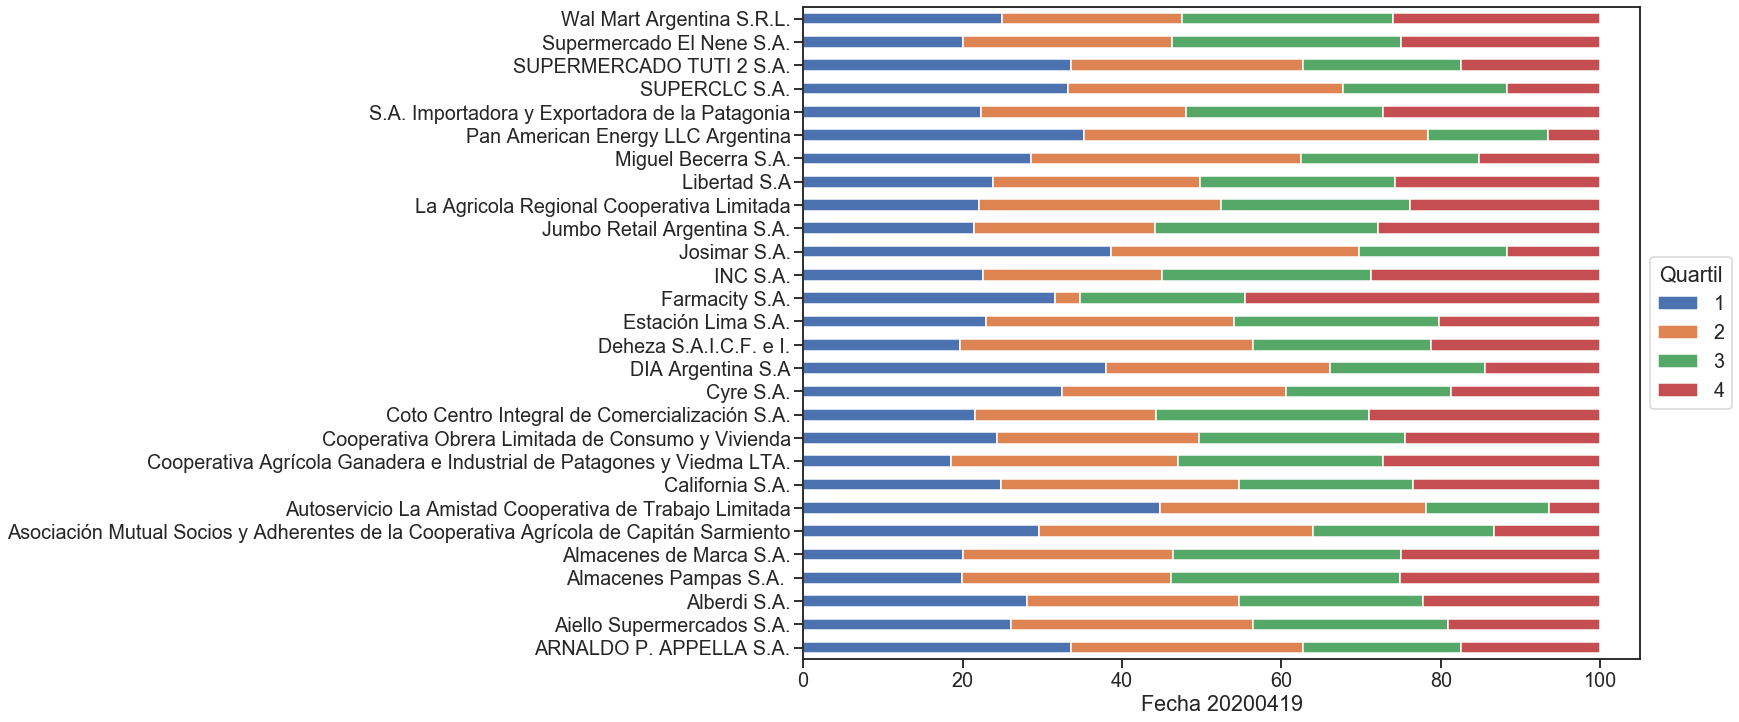

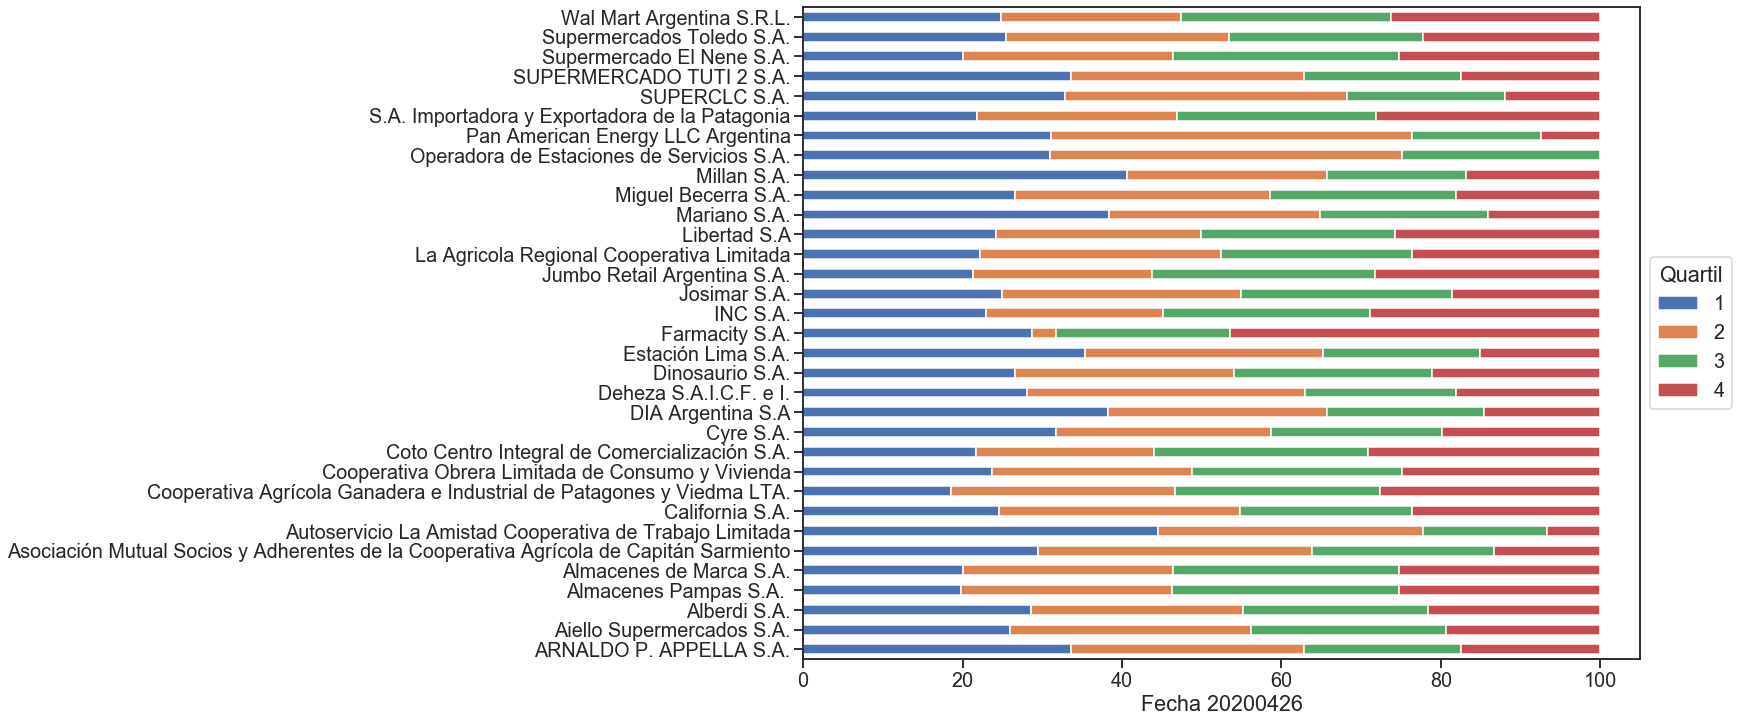

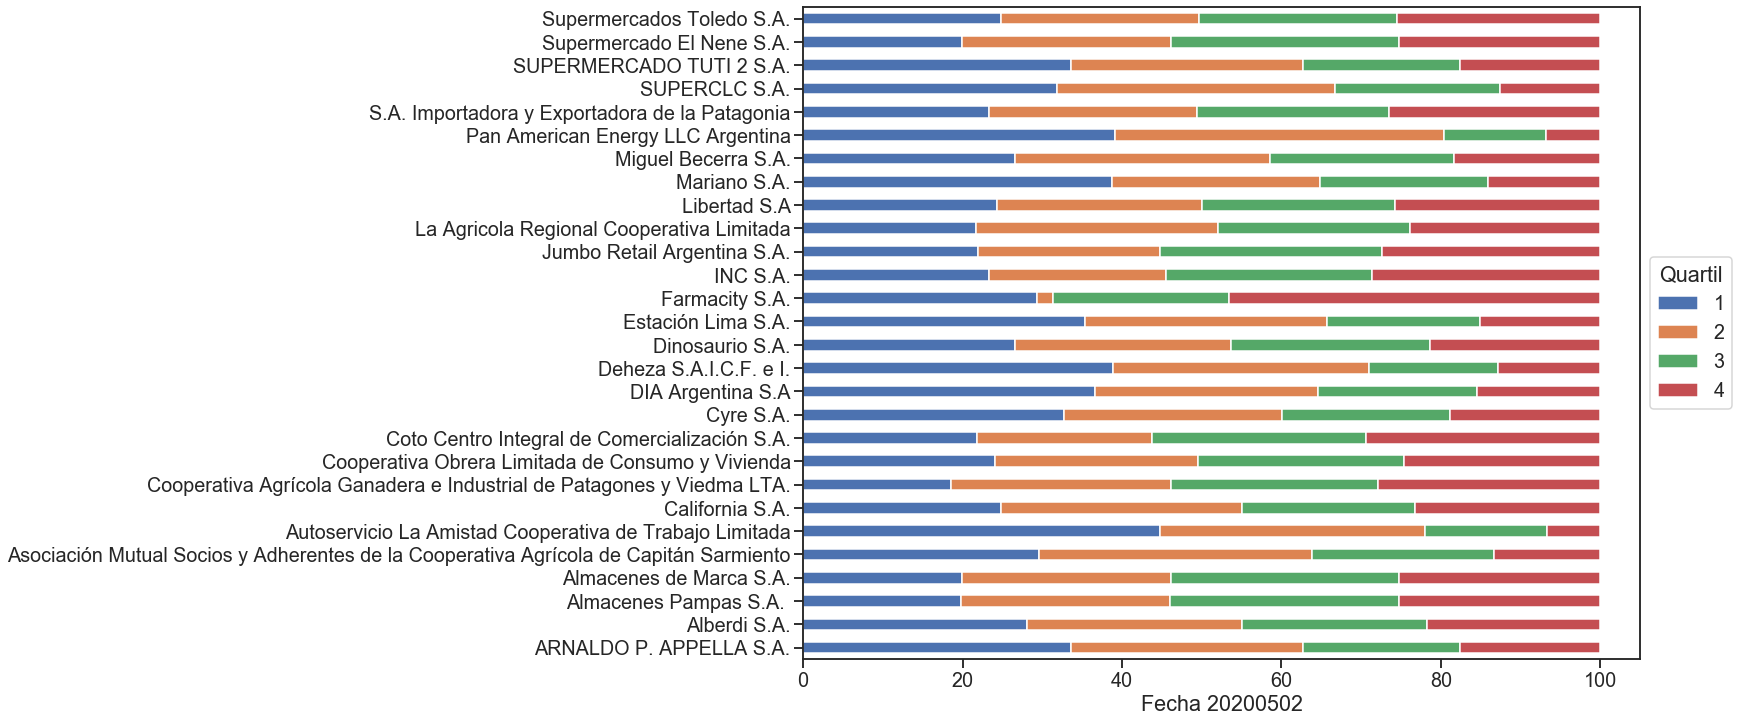

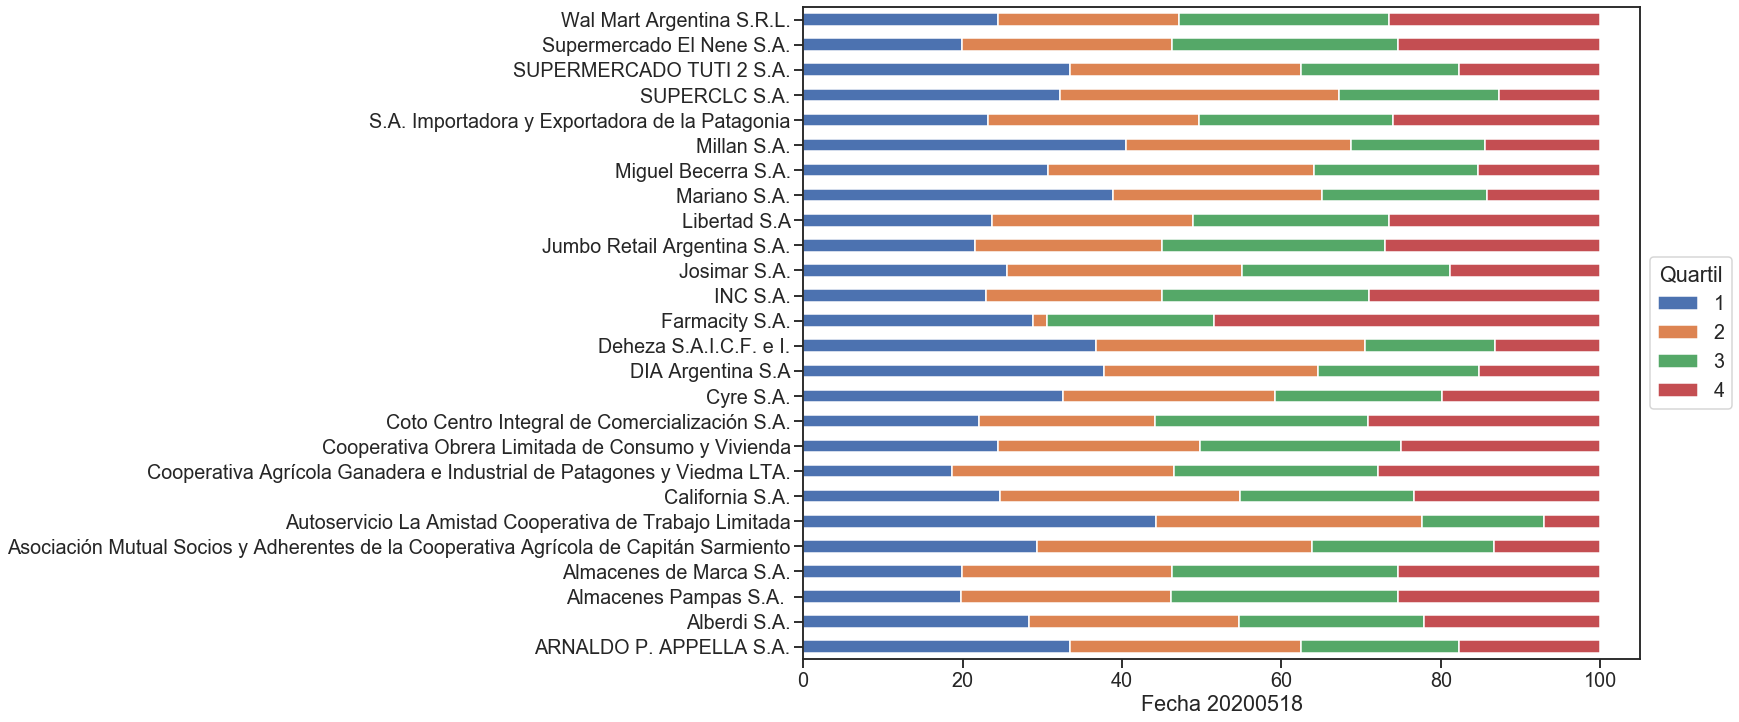

In [73]:
#Distribución del precio en quartiles por fecha en cada comercio 
matplotlib.rc('figure', figsize=(15, 12))
for i in pd.Series(datasetNew.fecha.unique()).sort_values():
    dia = (datasetNew.fecha == i)
    datasetNewAux=datasetNew[dia]
    plot = pd.crosstab(index=datasetNewAux['comercioRazonSocial'],
            columns=datasetNewAux['quartil']
                  ).apply(lambda r: r/r.sum() *100, axis=1).plot(kind='barh', stacked=True)
    plot.set_xlabel("Fecha %i" %i)
    plot.set_ylabel("")
    plot.legend(loc='center left',bbox_to_anchor=(1.0, 0.5),title='Quartil')

**Nota:** Los gráficos representan la distribución del precio en quartiles para cada comercio en una fecha determinada. 

**Cuál es la región/provincia con mayor promedio de precios? Y de menor promedio?**

In [74]:
#Armamos un dataset con los productos que se encuentran en todas las provincias y por ende en todas las regiones
datasetAllRegion=pd.merge(datasetPR, bienNumerico, on='producto_id',how='inner')
datasetAllRegion.head()

fecha sucursal_id    producto_id               nombre_sin_um  \
0  20200412     2-1-014  0000077900067  Manteca Extra Firme Ilolay   
1  20200412     10-1-48  0000077900067  Manteca Extra Firme Ilolay   
2  20200412    10-2-143  0000077900067  Manteca Extra Firme Ilolay   
3  20200412     10-1-25  0000077900067  Manteca Extra Firme Ilolay   
4  20200412     10-1-58  0000077900067  Manteca Extra Firme Ilolay   

       localidad              nom_provincia     region  \
0  Puerto Madryn                     Chubut  Patagonia   
1   Río Gallegos                 Santa Cruz  Patagonia   
2   Río Gallegos                 Santa Cruz  Patagonia   
3   San Fernando  Provincia de Buenos Aires     Centro   
4       Balcarce  Provincia de Buenos Aires     Centro   

                              comercioRazonSocial presentacion  precio  ...  \
0  S.A. Importadora y Exportadora de la Patagonia     200.0 gr   153.0  ...   
1                                        INC S.A.     200.0 gr   150.0  ...   
2                                        INC S.A.     200.0 gr   150.0  ...   
3                                        INC S.A.     200.0 gr   124.0  ...   
4                                        INC S.A.     200.0 gr   112.0  ...   

    marca PrecioXUnidad nuevaUnidad       media      desvio  rango  quartil  \
0  ILOLAY         765.0          kg  588.307143  141.550985    low        4   
1  ILOLAY         750.0          kg  588.307143  141.550985    low        4   
2  ILOLAY         750.0          kg  588.307143  141.550985    low        4   
3  ILOLAY         620.0          kg  588.307143  141.550985    low        3   
4  ILOLAY         560.0          kg  588.307143  141.550985    low        3   

  bienNumerico precioRelativo  count  
0   931.036000       0.821665     24  
1  1122.220000       0.668318     24  
2  1122.220000       0.668318     24  
3   963.366667       0.643576     24  
4   963.366667       0.581295     24  

[5 rows x 22 columns]

In [75]:
# Calculo la media de PrecioXUnidad por nombre de provincia
columnasimpor=['fecha','nom_provincia','PrecioXUnidad']
datasetPRMedia=datasetAllRegion[columnasimpor].groupby(['fecha','nom_provincia'],as_index=False).mean()
datasetPRMedia.columns=['fecha','nom_provincia','regionprovmean']
datasetPRMedia.groupby(['fecha']).max()

nom_provincia  regionprovmean
fecha                                 
20200412       Tucumán      737.742765
20200419       Tucumán      719.662135
20200426       Tucumán      717.374687
20200502       Tucumán      730.624967
20200518       Tucumán      705.232219

La provincia con mayor promedio de precios es Tucumán.

In [76]:
datasetPRMedia.groupby(['fecha']).min()

nom_provincia  regionprovmean
fecha                                 
20200412     Catamarca      483.307184
20200419     Catamarca      508.735975
20200426     Catamarca      492.269436
20200502     Catamarca      489.177262
20200518     Catamarca      485.112333

La provincia con menor promedio de precios es Catamarca.

**Son estadísticamente distintas las medias de los precios entre dos regiones (las que elijan)?**

In [77]:
# Calculo la media de PrecioXUnidad por region
columnasimpor=['fecha','region','PrecioXUnidad' ]
datasetPRMediaReg=datasetAllRegion[columnasimpor].groupby(['fecha','region'],as_index=False).mean()
datasetPRMediaReg.columns=['fecha','region','regionmean']
datasetPRMediaReg

fecha        region  regionmean
0   20200412        Centro  585.609907
1   20200412          Cuyo  596.105110
2   20200412  Norte Grande  594.892479
3   20200412     Patagonia  695.764054
4   20200419        Centro  591.854573
5   20200419          Cuyo  602.034543
6   20200419  Norte Grande  592.199751
7   20200419     Patagonia  688.615167
8   20200426        Centro  586.826526
9   20200426          Cuyo  599.256175
10  20200426  Norte Grande  587.998205
11  20200426     Patagonia  682.387926
12  20200502        Centro  594.654549
13  20200502          Cuyo  608.842189
14  20200502  Norte Grande  596.253335
15  20200502     Patagonia  697.694608
16  20200518        Centro  593.064926
17  20200518          Cuyo  596.583875
18  20200518  Norte Grande  602.462421
19  20200518     Patagonia  684.082280

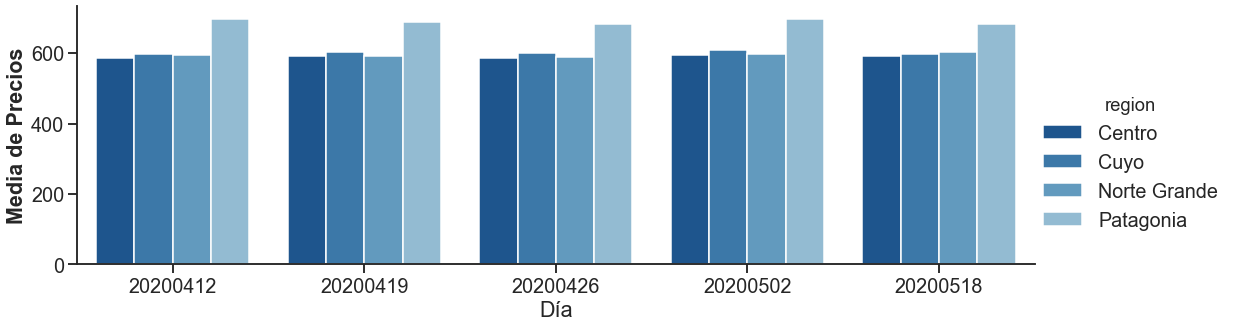

In [78]:
sns.catplot(x="fecha", y='regionmean', hue='region',
                data=datasetPRMediaReg,  
                kind="bar", height=5, aspect=3, palette=sns.color_palette("Blues_r"))
plt.xlabel('')
plt.ylabel('Media de Precios', weight='bold')

plt.xlabel('Día')
plt.ylabel('Media de Precios', weight='bold')
plt.show()

Como se puede observar en el gráfico anterior las medias de precios a nivel region por fecha son distintas entre regiones.

**Cuál es la probabilidad de que un precio en la provincia de Córdoba se encuentre por arriba de la media nacional?**

In [79]:
# Obtenemos un dataset cde medias de precios de Córdoba por fecha
df_product_mean_cba=datasetNew[datasetNew.nom_provincia=='Córdoba']
df_product_mean_cba=df_product_mean_cba[['fecha','producto_id','PrecioXUnidad']].groupby(['fecha','producto_id'],as_index=False).agg(['mean'])
df_product_mean_cba.columns = ['mediacba']
df_product_mean_cba = df_product_mean_cba.reset_index()
df_product_mean_cba.head()

fecha    producto_id  mediacba
0  20200412  0000000221184     254.0
1  20200412  0000000231688      69.4
2  20200412  0000000288989     385.4
3  20200412  0000000289153     233.9
4  20200412  0000000289177     477.9

In [80]:
datasetNewPais=pd.merge(datasetNew,df_product_mean_cba,on=['fecha','producto_id'])
datasetNewPais.head()

fecha sucursal_id    producto_id                nombre_sin_um  \
0  20200412     9-1-690  0000000221184  Salchichon Feteado Paladini   
1  20200412     9-2-583  0000000221184  Salchichon Feteado Paladini   
2  20200412     9-2-953  0000000221184  Salchichon Feteado Paladini   
3  20200412     9-1-690  0000000231688      Dulce de Zapallo Dulcor   
4  20200412     9-2-583  0000000231688      Dulce de Zapallo Dulcor   

       localidad nom_provincia  region          comercioRazonSocial  \
0    RIO TERCERO       Córdoba  Centro  Jumbo Retail Argentina S.A.   
1  VILLA ALLENDE       Córdoba  Centro  Jumbo Retail Argentina S.A.   
2  VENADO TUERTO      Santa Fe  Centro  Jumbo Retail Argentina S.A.   
3    RIO TERCERO       Córdoba  Centro  Jumbo Retail Argentina S.A.   
4  VILLA ALLENDE       Córdoba  Centro  Jumbo Retail Argentina S.A.   

  presentacion  precio  cantidad unidad     marca  PrecioXUnidad nuevaUnidad  \
0       1.0 kg   249.0       1.0     kg  PALADINI          249.0          kg   
1       1.0 kg   259.0       1.0     kg  PALADINI          259.0          kg   
2       1.0 kg   439.0       1.0     kg  PALADINI          439.0          kg   
3       1.0 kg    68.9       1.0     kg    DULCOR           68.9          kg   
4       1.0 kg    69.9       1.0     kg    DULCOR           69.9          kg   

        media     desvio rango quartil  mediacba  
0  315.666667  87.305339   low       2     254.0  
1  315.666667  87.305339   low       2     254.0  
2  315.666667  87.305339   low       3     254.0  
3   82.933333  19.143377   low       1      69.4  
4   82.933333  19.143377   low       1      69.4

In [81]:
print('Todos los dias juntos'
      '\n Porcentaje de precios de Córdoba cuya media esta por debajo la media país: %2i == %2.2f %% del total'
        %(len(datasetNewPais[datasetNewPais.media>datasetNewPais.mediacba]), len(datasetNewPais[datasetNewPais.media>datasetNewPais.mediacba])*100/float(len(datasetNewPais))))

print('')


for i in datasetNewPais.fecha.unique():
    precio_dia = len(datasetNewPais[(datasetNewPais.media>datasetNewPais.mediacba) & (datasetNewPais.fecha == i)])
    print('Día %i'
          '\n Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: %2i == %2.2f %% del total'
          %(i,
            precio_dia, precio_dia*100/float(len(datasetNewPais[datasetNewPais.fecha == i]))))

Todos los dias juntos
 Porcentaje de precios de Córdoba cuya media esta por debajo la media país: 1067331 == 70.42 % del total

Día 20200412
 Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: 212516 == 69.33 % del total
Día 20200419
 Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: 213705 == 67.69 % del total
Día 20200426
 Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: 260283 == 73.01 % del total
Día 20200502
 Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: 188642 == 71.34 % del total
Día 20200518
 Porcentaje de precios de Córdoba cuya media esta por debajo de la media país de precio: 192185 == 70.52 % del total


**Nota:** en general podemos decir que la probabilidad de que la media de un producto en Córdoba sea menor que la media del mismo producto a nivel país es cercana al 70%. 

### 3.2 Adicionales
A modo de ayuda, se propone un listado de preguntas adicionales. Podrán hacer uso de las mismas, aunque no es estrictamente necesario que las respondan. Algunas pueden resultarles de mayor interés que otras.

**- Se puede obtener de alguna forma la categoría de los productos a partir de sus nombres**

 Se puede obtener de diferentes maneras, pero se esta investigando la menera de poder caracterizar con el proceso "Name Entity Recognition with NLTK SpaCy". Las categoría
 es una rama importante para el análisis de los productos.
 Por otro lado los productos se dividieron anteriormente por los percentiles sobre los precios y también se generó una selección por rangos de precios.

**- Qué productos no están en todas las provincias?**

In [82]:
datasetPR_f = datasetPR.groupby('producto_id')[['fecha']].nunique().reset_index()
datasetPR_f = datasetPR_f[datasetPR_f.fecha == datasetNew.fecha.nunique()]
datasetPR_f.head()                            

producto_id  fecha
1  0000000002288      5
2  0000000205870      5
3  0000000205894      5
4  0000000205955      5
5  0000000205979      5

In [83]:
#Genero un dataFrame para contar los productos que aparecen en cada fecha y en cada provincia
datasetPR_new = datasetPR.groupby('producto_id')[['fecha','nom_provincia']].nunique().reset_index()
#Comparó para poder determinar que pertenencen a todas las fechas y a todas las provincias, con los valores unicos del dataFrame orginal.
datasetPR_new = datasetPR_new[(datasetPR_new.fecha == datasetNew.fecha.nunique()) & (datasetPR_new.nom_provincia == datasetNew.nom_provincia.nunique())]
#Creo una lista para poder mejorar la performance de mi función 
lista_prod_unicos = list(datasetPR_new.producto_id)
#Agrego a mi dataFrame una columna para determinar si ese producto pertenece o no pertenece a todas las provincias y a todas las fechas.
datasetPR['pertenece_all_fecha_provincia'] = [True if x in lista_prod_unicos else False for x in list(datasetPR.producto_id)] 
#Listo los productos que no estan en todas las provincias 
lista_prod = list(datasetPR.nombre_sin_um[datasetPR.pertenece_all_fecha_provincia == False].unique())
lista_prod[:5]

['Radicheta Atada La Anonima',
 'Desodorante Atitranspirante Nivea Pearl & Beauty 43',
 'Gel Exfoliante en Pomo Nivea Visage',
 'Desmaquillador de Ojos Bifasico en Botella Nivea',
 'Crema Facial Cuidado Radiante Nivea']

**- Qué marcas no están en todas las provincias?**

In [84]:
#En este caso tuve que utilizar un dataFrame diferente porque no tiene la marcas correspondientes.
datasetPR_new = datasetPR.groupby(['marca'])[['fecha','nom_provincia']].nunique().reset_index()
datasetPR_new = datasetPR_new[(datasetPR_new.nom_provincia == datasetNew.nom_provincia.nunique()) & (datasetPR_new.fecha == datasetNew.fecha.nunique()) ]
lista_prod_marcas = list(datasetPR_new.marca.unique())
#len(lista_prod_marcas)#371
#len(datasetPR.marca)
#Agrego la marca al dataframe para pode ejecutar mi proceso de identificar las marcas que no estan en todas las provincias.
datasetPR['pertenece_all_fecha_provincia_marca'] = datasetPR.marca.apply(lambda x: True if x in lista_prod_marcas else False) #[True if x in lista_prod_marcas else False for x in list(datasetPR_new.marca)] 
list_marcas = list(datasetPR.marca[datasetPR.pertenece_all_fecha_provincia_marca == False].unique())
list_marcas[:5]

['LA ANÓNIMA', 'NEVARES', 'TOP LINE', 'VAUQUITA', 'MENTHO PLUS']

**- Son variables independientes las provincias y las cadenas de supermercados?**

In [85]:
data_supermercado = datasetPR.comercioRazonSocial.value_counts(normalize=True)
data_supermercado

INC S.A.                                                                                 0.252390
Jumbo Retail Argentina S.A.                                                              0.115368
Wal Mart Argentina S.R.L.                                                                0.102823
S.A. Importadora y Exportadora de la Patagonia                                           0.084492
Libertad S.A                                                                             0.054800
Coto Centro Integral de Comercialización S.A.                                            0.041902
ARNALDO P. APPELLA S.A.                                                                  0.034578
SUPERMERCADO TUTI 2 S.A.                                                                 0.034576
Alberdi S.A.                                                                             0.033096
Autoservicio La Amistad Cooperativa de Trabajo Limitada                                  0.030828
Cooperativa Obrera L

In [86]:
data_provincia = datasetPR.nom_provincia.value_counts(normalize=True)
data_provincia

Provincia de Buenos Aires          0.352697
Córdoba                            0.080214
Neuquén                            0.058630
Salta                              0.051477
Santa Fe                           0.044570
Río Negro                          0.043856
Mendoza                            0.043780
Tucumán                            0.041573
Santa Cruz                         0.032363
Chubut                             0.029895
Ciudad Autónoma de Buenos Aires    0.027410
San Luis                           0.026903
Entre Ríos                         0.026901
Corrientes                         0.021752
Tierra del Fuego                   0.020576
La Pampa                           0.017868
Catamarca                          0.016397
Misiones                           0.014552
Jujuy                              0.013385
San Juan                           0.009760
Chaco                              0.009314
Formosa                            0.006411
Santiago del Estero             

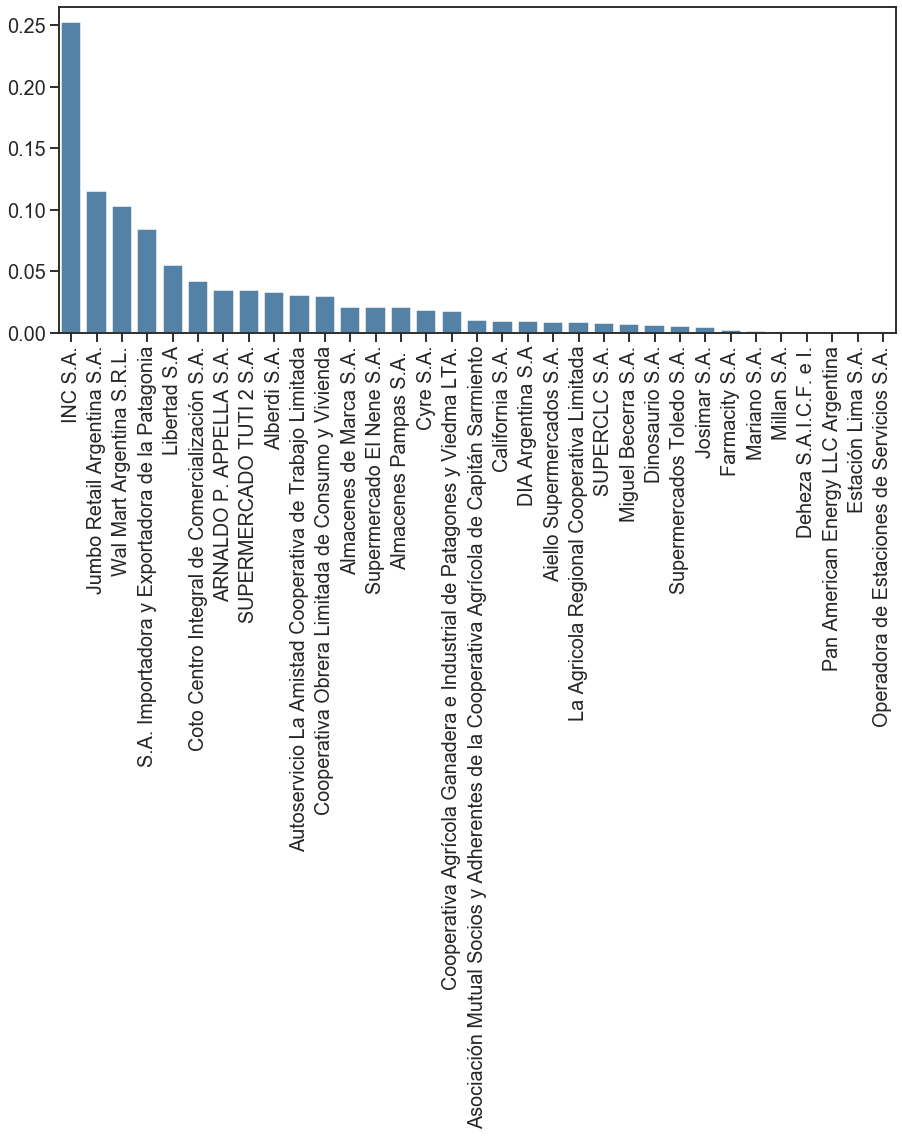

In [87]:
plt.figure(figsize=(15, 6))
sns.barplot(x=data_supermercado.index, y=data_supermercado.values, color='steelblue' )
plt.xticks(rotation=90)
plt.show()

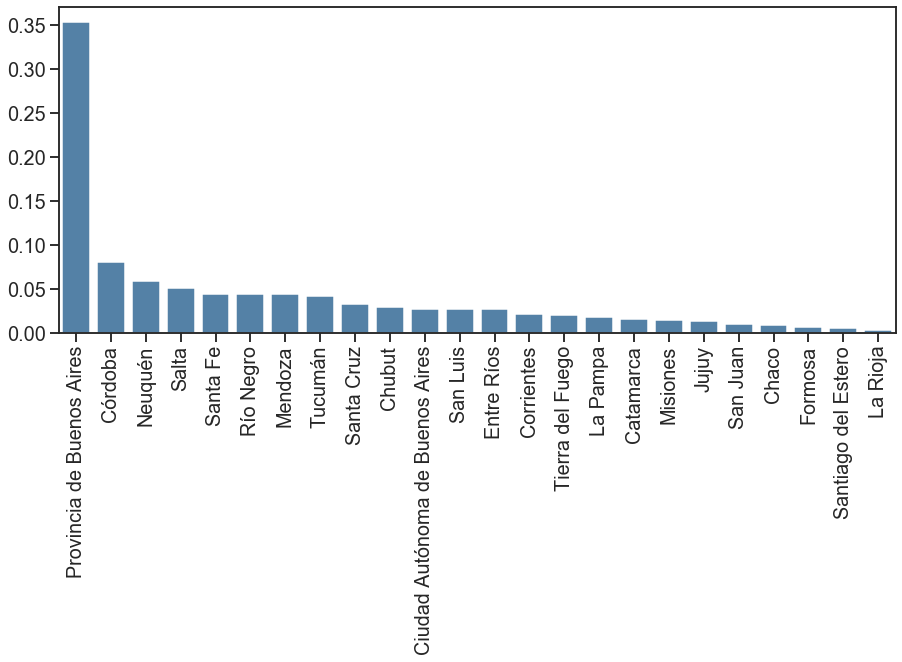

In [88]:
plt.figure(figsize=(15, 6))
sns.barplot(x=data_provincia.index, y=data_provincia.values, color='steelblue' )
plt.xticks(rotation=90)
plt.show()

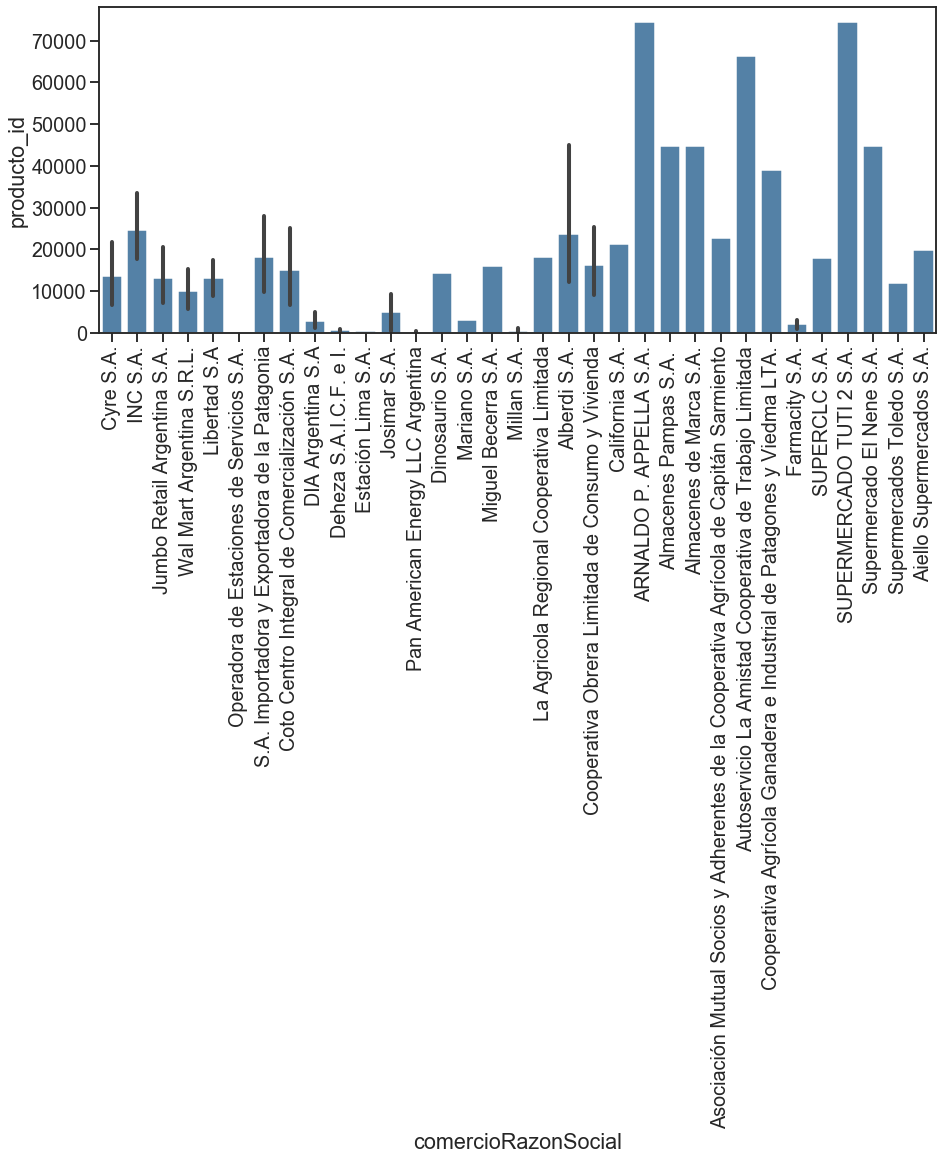

In [89]:
data_grafico = datasetPR.groupby(['nom_provincia','comercioRazonSocial']).count().reset_index()#nunique()
plt.figure(figsize=(15, 6))
sns.barplot(data = data_grafico ,x='comercioRazonSocial', y='producto_id', color='steelblue' )
plt.xticks(rotation=90)
plt.show()

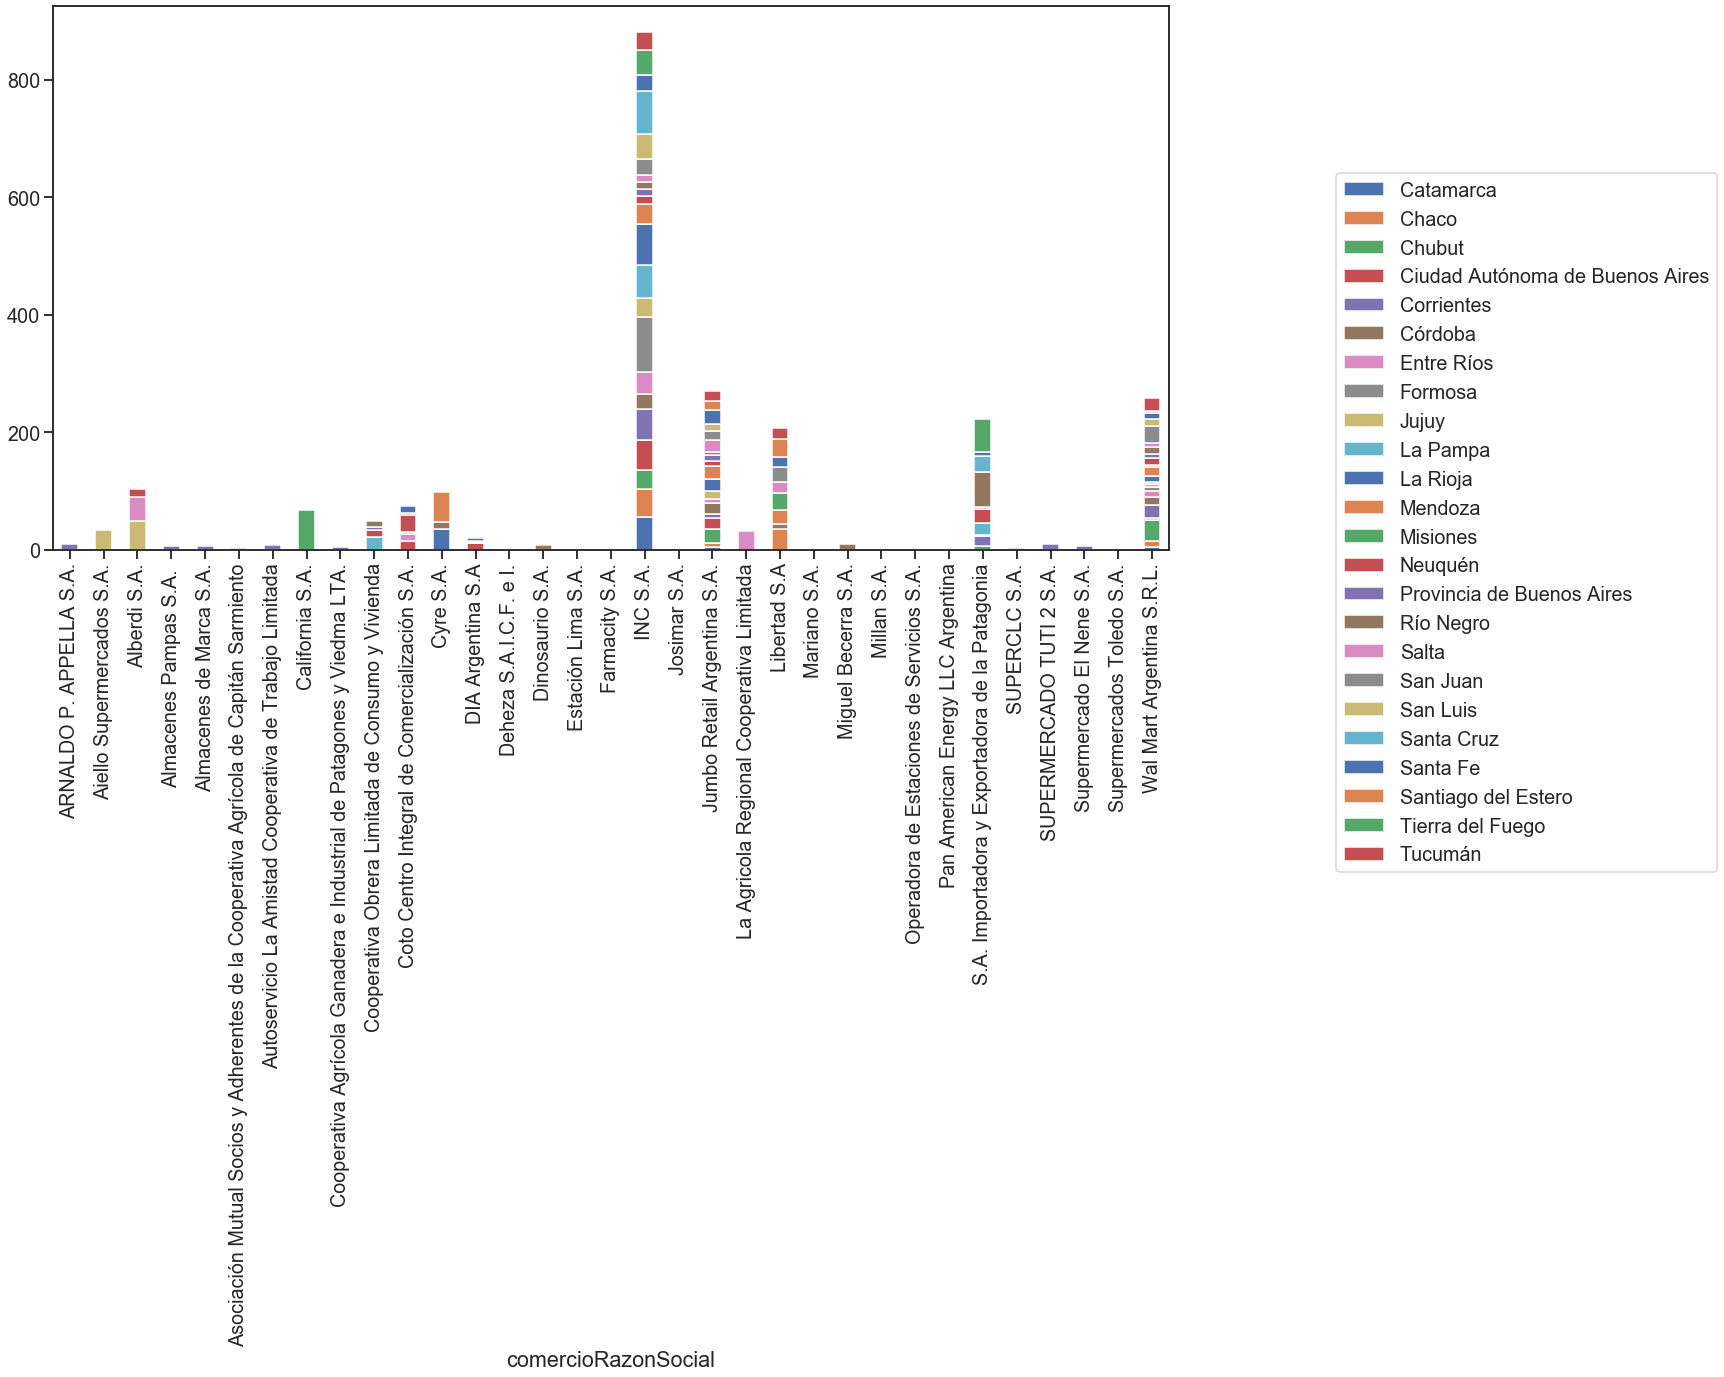

In [90]:
matplotlib.rc('figure', figsize=(20, 10))
plot = pd.crosstab(index= datasetPR['comercioRazonSocial'],
            columns= datasetPR['nom_provincia'],normalize=True
             ).apply(lambda r: r/r.sum() *100,axis=0).plot(kind='bar', stacked=True  )
plot.legend(loc="center right" , bbox_to_anchor=(1.5, 0.05))

In [91]:
#Generamos un crosstab entre la variable categorica provincia y la variable supermercado
datasetPR_tab = pd.crosstab(datasetPR.nom_provincia, datasetPR.comercioRazonSocial, margins = True)

In [92]:
#Generamos un crosstab entre la variable categorica provincia y la variable supermercado
#datasetPR_tab = pd.crosstab(datasetPR.nom_provincia, datasetPR.comercioRazonSocial, margins = True).reset_index()
#datasetPR_tab
datasetPR_tab.columns = ['S.A. Importadora y Exportadora de la Patagonia',
 'Jumbo Retail Argentina S.A.',
 'INC S.A.',
 'DIA Argentina S.A',
 'Libertad S.A',
 'Autoservicio La Amistad Cooperativa de Trabajo Limitada',
 'Coto Centro Integral de Comercialización S.A.',
 'Cooperativa Obrera Limitada de Consumo y Vivienda',
 'Alberdi S.A.',
 'Cooperativa Agrícola Ganadera e Industrial de Patagones y Viedma LTA.',
 'Wal Mart Argentina S.R.L.',
 'Aiello Supermercados S.A.',
 'California S.A.',
 'Cyre S.A.',
 'Miguel Becerra S.A.',
 'Supermercado El Nene S.A.',
 'Almacenes Pampas S.A. ',
 'Almacenes de Marca S.A.',
 'Mariano S.A.',
 'La Agricola Regional Cooperativa Limitada',
 'Josimar S.A.',
 'SUPERCLC S.A.',
 'Deheza S.A.I.C.F. e I.',
 'Estación Lima S.A.',
 'ARNALDO P. APPELLA S.A.',
 'SUPERMERCADO TUTI 2 S.A.',
 'Farmacity S.A.',
 'Asociación Mutual Socios y Adherentes de la Cooperativa Agrícola de Capitán Sarmiento',
 'Millan S.A.',
 'Pan American Energy LLC Argentina',
 'Supermercados Toledo S.A.',
 'Dinosaurio S.A.',
 'Operadora de Estaciones de Servicios S.A.',
 'row_totals']
datasetPR_tab.index = ['Catamarca',
 'Chaco',
 'Chubut',
 'Ciudad Autónoma de Buenos Aires',
 'Corrientes',
 'Córdoba',
 'Entre Ríos',
 'Formosa',
 'Jujuy',
 'La Pampa',
 'La Rioja',
 'Mendoza',
 'Misiones',
 'Neuquén',
 'Provincia de Buenos Aires',
 'Río Negro',
 'Salta',
 'San Juan',
 'San Luis',
 'Santa Cruz',
 'Santa Fe',
 'Santiago del Estero',
 'Tierra del Fuego',
 'Tucumán',
 'All']


In [93]:
datasetPR_tab.columns

Index(['S.A. Importadora y Exportadora de la Patagonia',
       'Jumbo Retail Argentina S.A.', 'INC S.A.', 'DIA Argentina S.A',
       'Libertad S.A',
       'Autoservicio La Amistad Cooperativa de Trabajo Limitada',
       'Coto Centro Integral de Comercialización S.A.',
       'Cooperativa Obrera Limitada de Consumo y Vivienda', 'Alberdi S.A.',
       'Cooperativa Agrícola Ganadera e Industrial de Patagones y Viedma LTA.',
       'Wal Mart Argentina S.R.L.', 'Aiello Supermercados S.A.',
       'California S.A.', 'Cyre S.A.', 'Miguel Becerra S.A.',
       'Supermercado El Nene S.A.', 'Almacenes Pampas S.A. ',
       'Almacenes de Marca S.A.', 'Mariano S.A.',
       'La Agricola Regional Cooperativa Limitada', 'Josimar S.A.',
       'SUPERCLC S.A.', 'Deheza S.A.I.C.F. e I.', 'Estación Lima S.A.',
       'ARNALDO P. APPELLA S.A.', 'SUPERMERCADO TUTI 2 S.A.', 'Farmacity S.A.',
       'Asociación Mutual Socios y Adherentes de la Cooperativa Agrícola de Capitán Sarmiento',
       'Millan S

In [94]:
#Generamos la tabla de valores obtenidos sin las filas y columnas de totales
datasetPR_tab_new = datasetPR_tab.drop(['row_totals'], axis=1)
datasetPR_tab_new=datasetPR_tab_new[:-1]
datasetPR_tab_new

S.A. Importadora y Exportadora de la Patagonia  \
Catamarca                                                                     0   
Chaco                                                                         0   
Chubut                                                                        0   
Ciudad Autónoma de Buenos Aires                                               0   
Corrientes                                                                    0   
Córdoba                                                                       0   
Entre Ríos                                                                    0   
Formosa                                                                       0   
Jujuy                                                                         0   
La Pampa                                                                      0   
La Rioja                                                                      0   
Mendoza                                                                       0   
Misiones                                                                      0   
Neuquén                                                                       0   
Provincia de Buenos Aires                                                 74437   
Río Negro                                                                     0   
Salta                                                                         0   
San Juan                                                                      0   
San Luis                                                                      0   
Santa Cruz                                                                    0   
Santa Fe                                                                      0   
Santiago del Estero                                                           0   
Tierra del Fuego                                                              0   
Tucumán                                                                       0   

                                 Jumbo Retail Argentina S.A.  INC S.A.  \
Catamarca                                                  0         0   
Chaco                                                      0         0   
Chubut                                                     0         0   
Ciudad Autónoma de Buenos Aires                            0         0   
Corrientes                                                 0         0   
Córdoba                                                    0         0   
Entre Ríos                                                 0         0   
Formosa                                                    0         0   
Jujuy                                                      0     14065   
La Pampa                                                   0         0   
La Rioja                                                   0         0   
Mendoza                                                    0         0   
Misiones                                                   0         0   
Neuquén                                                    0         0   
Provincia de Buenos Aires                                  0         0   
Río Negro                                                  0         0   
Salta                                                      0     44932   
San Juan                                                   0         0   
San Luis                                               19802         0   
Santa Cruz                                                 0         0   
Santa Fe                                                   0         0   
Santiago del Estero                                        0         0   
Tierra del Fuego                                           0         0   
Tucumán                                                    0     12249   

                                 DIA Argentina S.A  Libertad S.A  \
Catamarca                             

In [95]:
chi2_result,p_value,df_value,table_expected=sp.stats.chi2_contingency(observed=datasetPR_tab_new)

In [96]:
confidence_level = 0.95
crit_value = sp.stats.chi2.ppf(q = confidence_level, df=datasetPR_tab_new)
print()
#print ('Resultados Tabla de Contingencia')
#print ('====================================')
#print(table_expected)
#print()
print ('chi2:', chi2_result)
print ('p-value= %.5f'% p_value)
print ('df = ', df_value)
#print('Valor Crítico: ',crit_value)


chi2: 7172119.651333343
p-value= 0.00000
df =  736


Nota: Como se puede observar en el p-valor obtenido las variables provincia y cadena son dependientes dado que el valor es menor que el valor de significancia y por tanto se rechaza la hipotesis nula.

**- Conclusiones Adionales del trabajo realizado**

A continuacion presentamos informmación que determinan sobre el conjunto de datos que región es mas barata con respecto a otras utilizando la mediana

In [97]:
# Calculo la mediana de precio de producto por región agregando la columna nueva
columnasimpor=['fecha','region','PrecioXUnidad' ]
datasetPRMediana=datasetAllRegion[columnasimpor].groupby(['fecha', 'region'],as_index=False).median()
datasetPRMediana.columns=['fecha','region','regionmean']
datasetPRMediana

fecha        region  regionmean
0   20200412        Centro     325.000
1   20200412          Cuyo     328.320
2   20200412  Norte Grande     328.210
3   20200412     Patagonia     368.000
4   20200419        Centro     326.940
5   20200419          Cuyo     322.220
6   20200419  Norte Grande     328.210
7   20200419     Patagonia     368.000
8   20200426        Centro     319.775
9   20200426          Cuyo     326.000
10  20200426  Norte Grande     325.050
11  20200426     Patagonia     366.670
12  20200502        Centro     325.640
13  20200502          Cuyo     345.880
14  20200502  Norte Grande     325.000
15  20200502     Patagonia     352.030
16  20200518        Centro     325.640
17  20200518          Cuyo     329.250
18  20200518  Norte Grande     331.920
19  20200518     Patagonia     357.500

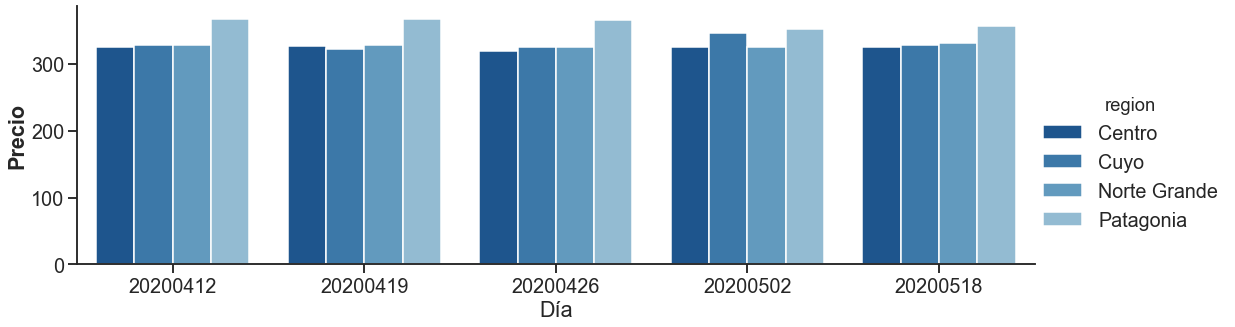

In [98]:
sns.catplot(x="fecha", y='regionmean', hue='region',
                data=datasetPRMediana,  
                kind="bar", height=5, aspect=3, palette=sns.color_palette("Blues_r"))
plt.xlabel('')
plt.ylabel('Precio', weight='bold')

plt.xlabel('Día')
plt.ylabel('Precio', weight='bold')
plt.show()